In [36]:
 import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-bright')

from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.stats.stattools import durbin_watson
from statsmodels.tsa.api import VAR
from statsmodels.tsa.api import VECM
from statsmodels.tsa.vector_ar.vecm import select_coint_rank
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from statsmodels.tsa.stattools import adfuller
import scipy


/var/folders/76/6_zx5hh17x91wqhg7x9nz_640000gn/T/ipykernel_91433/121186198.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-bright')


In [37]:
import pandas as pd

# Assuming merged_data_5 is the file path
merged_data_5 = 'merged_data_5.xlsx'

# Read data from Excel file into DataFrame
new_data = pd.read_excel(merged_data_5)

In [38]:
new_data

,YearMonth,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,RM/USD_exchange,Overnight_Interest_Rate,CPI,WTI_price
0,2017-03,2.13,2.41,2.11,5803.65,5566.04,4.44,3.00,119.4,49.67
1,2017-04,2.22,2.50,2.15,5944.58,5702.42,4.41,3.00,119.2,51.12
2,2017-05,2.08,2.36,2.01,5707.10,5480.76,4.31,3.00,119.0,48.66
3,2017-06,1.99,2.25,1.91,5730.11,5506.28,4.28,2.99,118.7,45.20
4,2017-07,1.98,2.23,1.96,5624.14,5406.38,4.29,2.98,118.7,46.70
...,...,...,...,...,...,...,...,...,...,...
72,2023-03,2.05,3.35,2.15,9048.91,8689.61,4.47,2.74,129.9,73.37
73,2023-04,2.05,3.35,2.15,9386.67,9014.83,4.42,2.74,130.0,79.44
74,2023-05,2.05,3.35,2.15,9536.10,9162.00,4.52,2.97,130.2,71.74
75,2023-06,2.05,3.37,2.15,9552.95,9179.75,4.63,2.99,130.4,70.37


In [39]:
new_data.shape

(77, 10)

In [40]:
####################### VAR with second differencing and 0.6 train set###########################

In [41]:
0.6*77

46.199999999999996

In [42]:
df_train = new_data[0:46]
df_test = new_data[46:]

In [43]:
df_train

,YearMonth,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,RM/USD_exchange,Overnight_Interest_Rate,CPI,WTI_price
0,2017-03,2.13,2.41,2.11,5803.65,5566.04,4.44,3.00,119.4,49.67
1,2017-04,2.22,2.50,2.15,5944.58,5702.42,4.41,3.00,119.2,51.12
2,2017-05,2.08,2.36,2.01,5707.10,5480.76,4.31,3.00,119.0,48.66
3,2017-06,1.99,2.25,1.91,5730.11,5506.28,4.28,2.99,118.7,45.20
4,2017-07,1.98,2.23,1.96,5624.14,5406.38,4.29,2.98,118.7,46.70
5,2017-08,2.13,2.40,2.04,5819.77,5594.23,4.28,2.97,119.8,48.06
6,2017-09,2.19,2.49,2.10,5871.76,5644.12,4.21,2.96,120.1,49.65
7,2017-10,2.18,2.48,2.13,5744.71,5379.00,4.23,2.97,120.0,51.59
8,2017-11,2.31,2.59,2.22,5677.50,5458.32,4.17,2.94,120.8,56.74
9,2017-12,2.27,2.54,2.22,5467.05,5255.58,4.08,2.95,120.9,57.98


In [44]:
df_test

,YearMonth,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,RM/USD_exchange,Overnight_Interest_Rate,CPI,WTI_price
46,2021-01,1.87,2.17,2.05,8009.74,7694.84,4.04,1.74,122.1,52.12
47,2021-02,1.98,2.28,2.14,7784.53,7479.84,4.05,1.75,122.5,59.17
48,2021-03,2.05,2.43,2.15,7509.09,7215.00,4.11,1.72,122.9,62.36
49,2021-04,2.05,2.55,2.15,7679.48,7380.62,4.12,1.71,123.1,61.70
50,2021-05,2.05,2.60,2.15,8092.06,7774.18,4.13,1.73,123.1,65.30
51,2021-06,2.05,2.66,2.15,8063.35,7748.20,4.13,1.72,123.2,71.35
52,2021-07,2.05,2.72,2.15,8031.61,7719.44,4.20,1.74,122.5,72.71
53,2021-08,2.05,2.74,2.15,8001.35,7689.40,4.22,1.74,122.5,67.71
54,2021-09,2.05,2.74,2.15,7875.05,7568.89,4.17,1.74,122.8,71.30
55,2021-10,2.05,2.87,2.15,7841.60,7536.10,4.16,1.74,123.7,81.22


In [45]:
df_train.set_index('YearMonth', inplace=True)

In [46]:
df_test.set_index('YearMonth', inplace=True)

In [47]:
df_train.columns

Index(['RON 95', 'RON 97', 'DIESEL', 'selling_gold_price', 'buying_gold_price',
       'RM/USD_exchange', 'Overnight_Interest_Rate', 'CPI', 'WTI_price'],
      dtype='object')

In [48]:
df_train.drop(columns=['RM/USD_exchange', 'CPI', 'WTI_price'],inplace=True)

/var/folders/76/6_zx5hh17x91wqhg7x9nz_640000gn/T/ipykernel_91433/1420967189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(columns=['RM/USD_exchange', 'CPI', 'WTI_price'],inplace=True)


In [49]:
df_test.drop(columns=['RM/USD_exchange', 'CPI', 'WTI_price'],inplace=True)

/var/folders/76/6_zx5hh17x91wqhg7x9nz_640000gn/T/ipykernel_91433/2540464449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['RM/USD_exchange', 'CPI', 'WTI_price'],inplace=True)


In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

In [51]:
#We apply the log to make the variance constant
df_train_log = np.log(df_train)

In [52]:
df_train_log

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2017-03,0.756122,0.879627,0.746688,8.666242,8.624439,1.098612
2017-04,0.797507,0.916291,0.765468,8.690235,8.648646,1.098612
2017-05,0.732368,0.858662,0.698135,8.649466,8.608999,1.098612
2017-06,0.688135,0.810930,0.647103,8.653490,8.613645,1.095273
2017-07,0.683097,0.802002,0.672944,8.634823,8.595335,1.091923
2017-08,0.756122,0.875469,0.712950,8.669016,8.629491,1.088562
2017-09,0.783902,0.912283,0.741937,8.677910,8.638370,1.085189
2017-10,0.779325,0.908259,0.756122,8.656035,8.590258,1.088562
2017-11,0.837248,0.951658,0.797507,8.644266,8.604896,1.078410


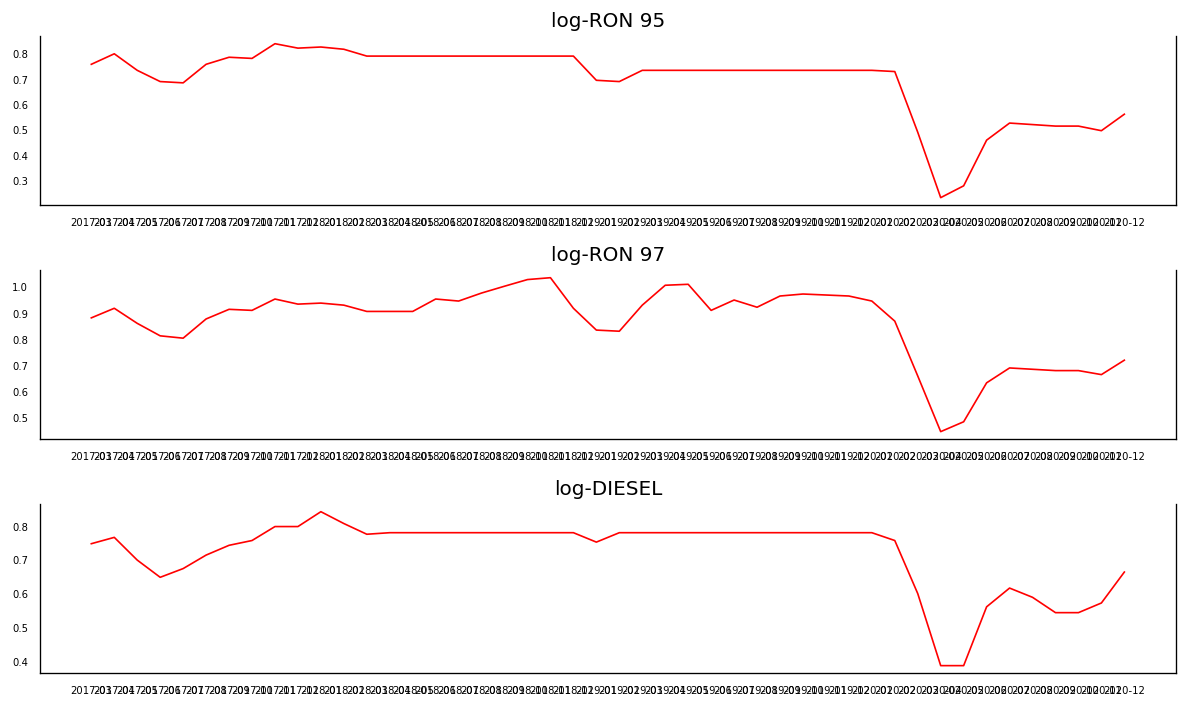

In [53]:
import matplotlib.pyplot as plt

# List of columns you want to plot
columns_to_plot = ['RON 95', 'RON 97', 'DIESEL']

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=1, dpi=120, figsize=(10,6))

# Enumerate through axes and columns_to_plot
for i, ax in enumerate(axes.flatten()):
    if i < len(columns_to_plot):  # To avoid index out of range error
        # Extract data for the current column
        data = df_train_log[columns_to_plot[i]]
        # Plot the data
        ax.plot(data, color='red', linewidth=1)
        # Customize the plot
        ax.set_title("log-" + columns_to_plot[i])  # Set title
        ax.xaxis.set_ticks_position('none')  # Remove x-axis ticks
        ax.yaxis.set_ticks_position('none')  # Remove y-axis ticks
        ax.spines["top"].set_alpha(0)  # Remove top border
        ax.tick_params(labelsize=6)  # Set tick label size

plt.tight_layout()
plt.show()


In [54]:
new_data

,YearMonth,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,RM/USD_exchange,Overnight_Interest_Rate,CPI,WTI_price
0,2017-03,2.13,2.41,2.11,5803.65,5566.04,4.44,3.00,119.4,49.67
1,2017-04,2.22,2.50,2.15,5944.58,5702.42,4.41,3.00,119.2,51.12
2,2017-05,2.08,2.36,2.01,5707.10,5480.76,4.31,3.00,119.0,48.66
3,2017-06,1.99,2.25,1.91,5730.11,5506.28,4.28,2.99,118.7,45.20
4,2017-07,1.98,2.23,1.96,5624.14,5406.38,4.29,2.98,118.7,46.70
...,...,...,...,...,...,...,...,...,...,...
72,2023-03,2.05,3.35,2.15,9048.91,8689.61,4.47,2.74,129.9,73.37
73,2023-04,2.05,3.35,2.15,9386.67,9014.83,4.42,2.74,130.0,79.44
74,2023-05,2.05,3.35,2.15,9536.10,9162.00,4.52,2.97,130.2,71.74
75,2023-06,2.05,3.37,2.15,9552.95,9179.75,4.63,2.99,130.4,70.37


In [55]:
new_data.set_index('YearMonth', inplace=True)

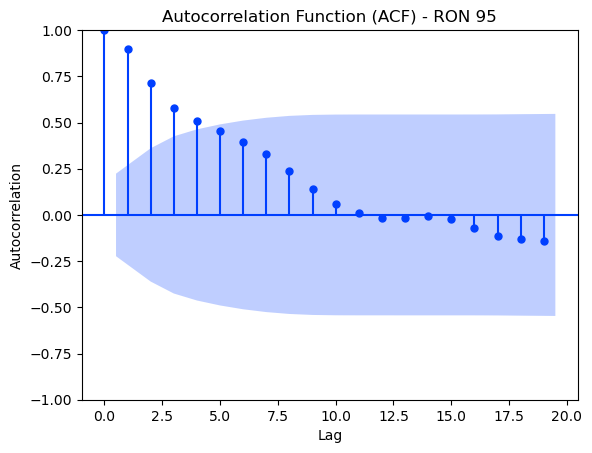

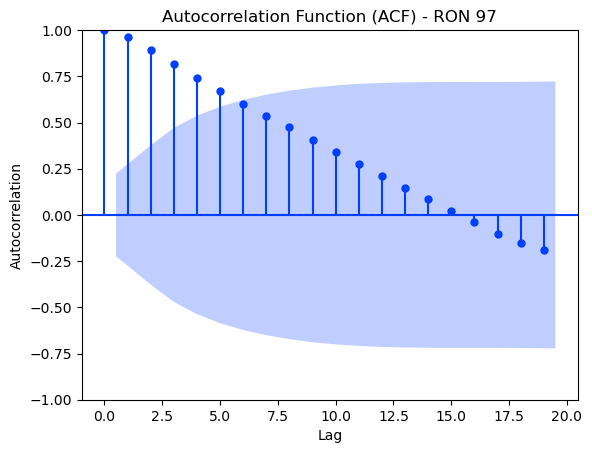

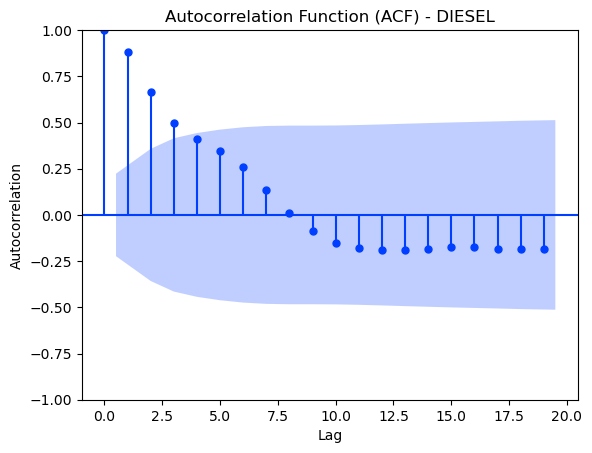

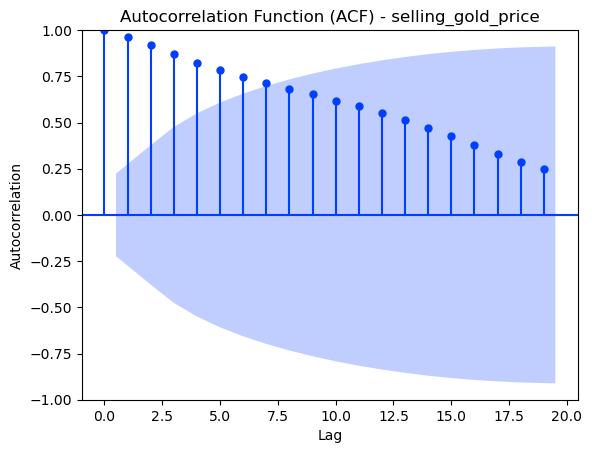

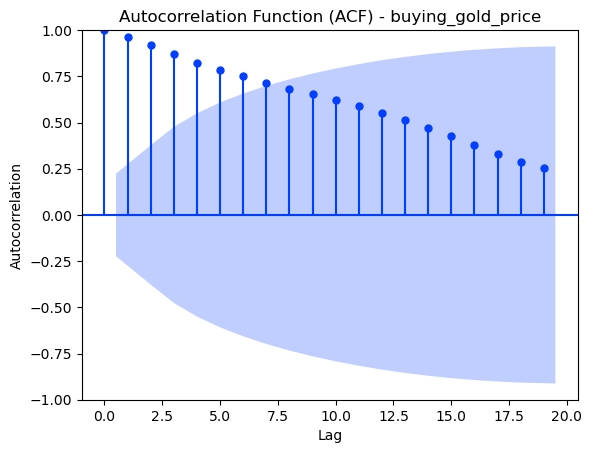

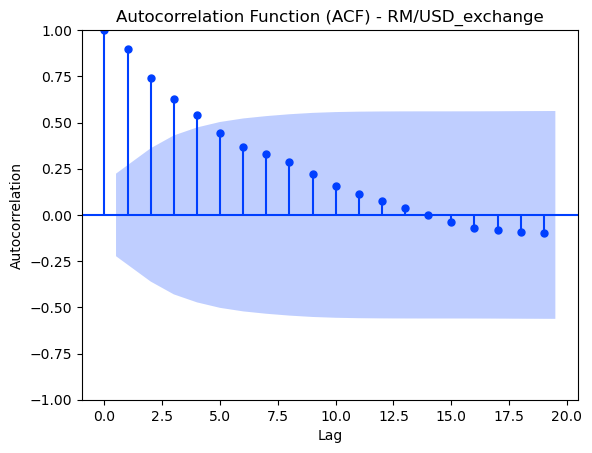

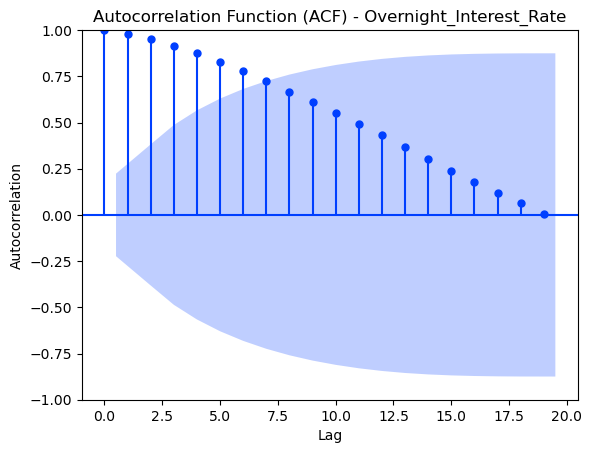

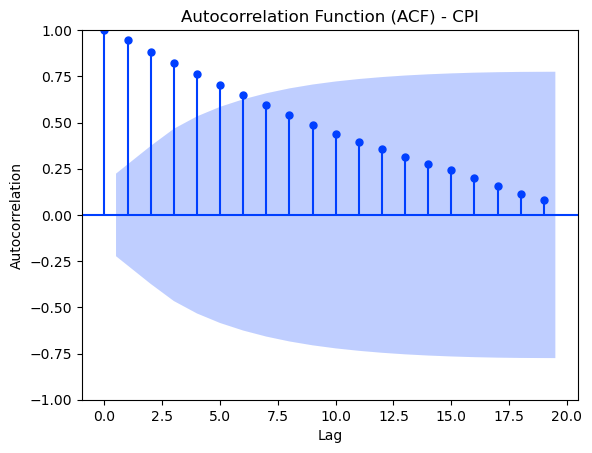

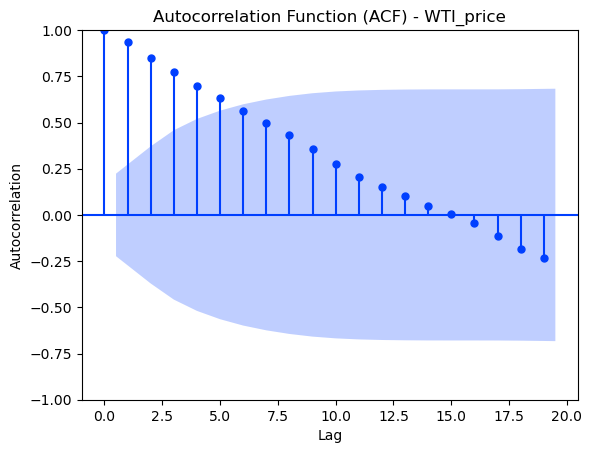

In [56]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Iterate over each column in the DataFrame
for column in new_data.columns:
    # Plot ACF for the current column
    plot_acf(new_data[column], title=f'Autocorrelation Function (ACF) - {column}')
    plt.xlabel('Lag')
    plt.ylabel('Autocorrelation')
    plt.show()

In [57]:
df_train_log

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2017-03,0.756122,0.879627,0.746688,8.666242,8.624439,1.098612
2017-04,0.797507,0.916291,0.765468,8.690235,8.648646,1.098612
2017-05,0.732368,0.858662,0.698135,8.649466,8.608999,1.098612
2017-06,0.688135,0.810930,0.647103,8.653490,8.613645,1.095273
2017-07,0.683097,0.802002,0.672944,8.634823,8.595335,1.091923
2017-08,0.756122,0.875469,0.712950,8.669016,8.629491,1.088562
2017-09,0.783902,0.912283,0.741937,8.677910,8.638370,1.085189
2017-10,0.779325,0.908259,0.756122,8.656035,8.590258,1.088562
2017-11,0.837248,0.951658,0.797507,8.644266,8.604896,1.078410


In [58]:
df_test

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2021-01,1.87,2.17,2.05,8009.74,7694.84,1.74
2021-02,1.98,2.28,2.14,7784.53,7479.84,1.75
2021-03,2.05,2.43,2.15,7509.09,7215.00,1.72
2021-04,2.05,2.55,2.15,7679.48,7380.62,1.71
2021-05,2.05,2.60,2.15,8092.06,7774.18,1.73
2021-06,2.05,2.66,2.15,8063.35,7748.20,1.72
2021-07,2.05,2.72,2.15,8031.61,7719.44,1.74
2021-08,2.05,2.74,2.15,8001.35,7689.40,1.74
2021-09,2.05,2.74,2.15,7875.05,7568.89,1.74


In [59]:
from statsmodels.tsa.stattools import acf, pacf, adfuller

def adf_test(time_series):
    result = adfuller(df_train_log[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_train_log.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -1.438272
p-value (RON 95): 0.563797
Critical Values:
   1%: -3.596635636000432
   5%: -2.933297331821618
   10%: -2.6049909750566895
-----------------------------------
ADF Statistic (RON 97): -1.628158
p-value (RON 97): 0.468455
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338
-----------------------------------
ADF Statistic (DIESEL): -1.404296
p-value (DIESEL): 0.580215
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338
-----------------------------------
ADF Statistic (selling_gold_price): -0.165129
p-value (selling_gold_price): 0.942553
Critical Values:
   1%: -3.5885733964124715
   5%: -2.929885661157025
   10%: -2.6031845661157025
-----------------------------------
ADF Statistic (buying_gold_price): -0.043801
p-value (buying_gold_price): 0.954756
Critical Values:
   1%: -3.5885733964124715
   5%: -2.929885661157025
   10%: -2.6031845661157025
--------------------

In [60]:
 #Let's difference our series once and drop NA values
df_train_log_diff = (df_train_log).diff().dropna()

In [61]:
df_train_log_diff.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
Overnight_Interest_Rate    0
dtype: int64

In [62]:
def adf_test(time_series):
    result = adfuller(df_train_log_diff[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_train_log_diff.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -3.992115
p-value (RON 95): 0.001452
Critical Values:
   1%: -3.60098336718852
   5%: -2.9351348158036012
   10%: -2.6059629803688282
-----------------------------------
ADF Statistic (RON 97): -5.371789
p-value (RON 97): 0.000004
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338
-----------------------------------
ADF Statistic (DIESEL): -6.685676
p-value (DIESEL): 0.000000
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338
-----------------------------------
ADF Statistic (selling_gold_price): -4.629189
p-value (selling_gold_price): 0.000114
Critical Values:
   1%: -3.5885733964124715
   5%: -2.929885661157025
   10%: -2.6031845661157025
-----------------------------------
ADF Statistic (buying_gold_price): -5.053061
p-value (buying_gold_price): 0.000017
Critical Values:
   1%: -3.5885733964124715
   5%: -2.929885661157025
   10%: -2.6031845661157025
--------------------

In [63]:
# Let's difference only the 'Overnight_Interest_Rate' column once and drop NA values
df_train_log_diff['Overnight_Interest_Rate'] = df_train_log_diff['Overnight_Interest_Rate'].diff().dropna()

In [64]:
df_train_log_diff.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
Overnight_Interest_Rate    1
dtype: int64

In [65]:
df_train_log_diff

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2017-04,0.041385,0.036664,0.018780,0.023993,0.024207,NaN
2017-05,-0.065139,-0.057629,-0.067333,-0.040769,-0.039647,0.000000
2017-06,-0.044233,-0.047731,-0.051031,0.004024,0.004645,-0.003339
2017-07,-0.005038,-0.008929,0.025841,-0.018667,-0.018310,-0.000011
2017-08,0.073025,0.073467,0.040005,0.034193,0.034156,-0.000011
2017-09,0.027780,0.036814,0.028988,0.008894,0.008879,-0.000011
2017-10,-0.004577,-0.004024,0.014185,-0.021875,-0.048112,0.006745
2017-11,0.057923,0.043399,0.041385,-0.011768,0.014639,-0.013525
2017-12,-0.017468,-0.019494,0.000000,-0.037772,-0.037851,0.013548


In [66]:
df_train_log_diff.dropna(inplace= True)

In [67]:
def adf_test(time_series):
    result = adfuller(df_train_log_diff[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_train_log_diff.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -4.047393
p-value (RON 95): 0.001182
Critical Values:
   1%: -3.6055648906249997
   5%: -2.937069375
   10%: -2.606985625
-----------------------------------
ADF Statistic (RON 97): -5.302753
p-value (RON 97): 0.000005
Critical Values:
   1%: -3.596635636000432
   5%: -2.933297331821618
   10%: -2.6049909750566895
-----------------------------------
ADF Statistic (DIESEL): -6.578516
p-value (DIESEL): 0.000000
Critical Values:
   1%: -3.596635636000432
   5%: -2.933297331821618
   10%: -2.6049909750566895
-----------------------------------
ADF Statistic (selling_gold_price): -4.598976
p-value (selling_gold_price): 0.000130
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338
-----------------------------------
ADF Statistic (buying_gold_price): -5.012659
p-value (buying_gold_price): 0.000021
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338
----------------------------------

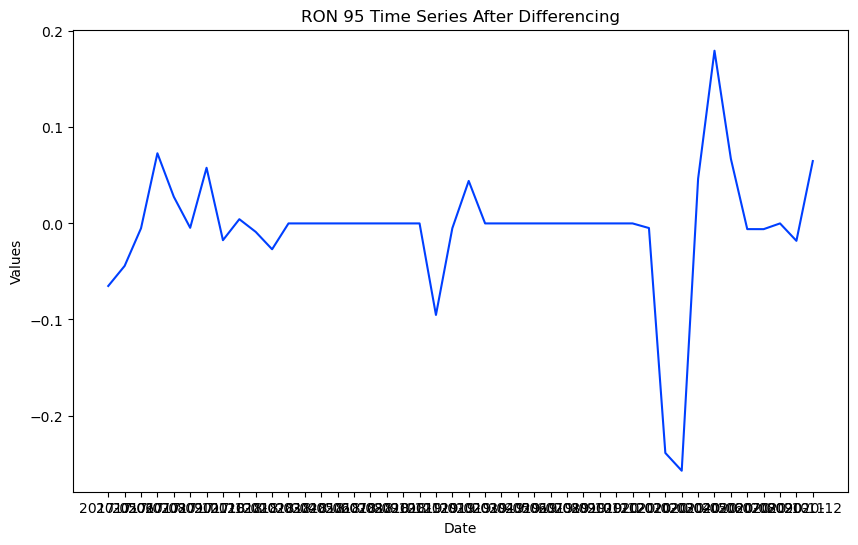

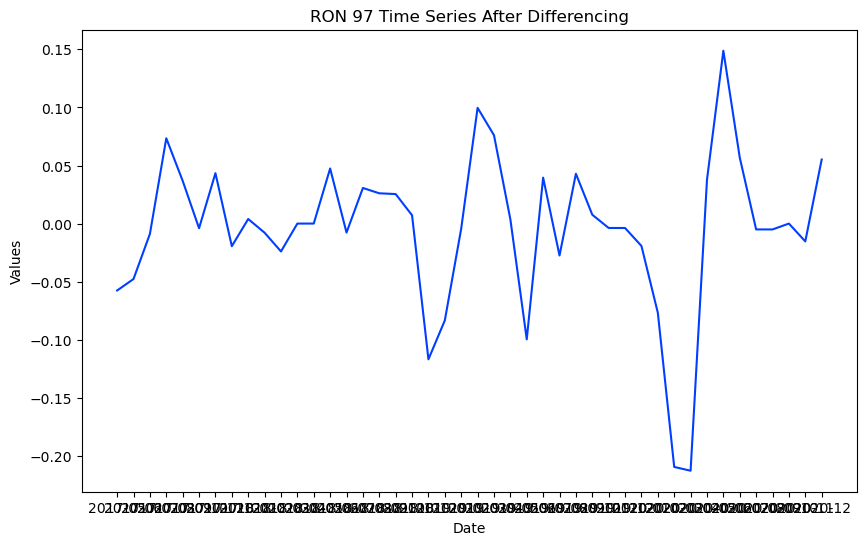

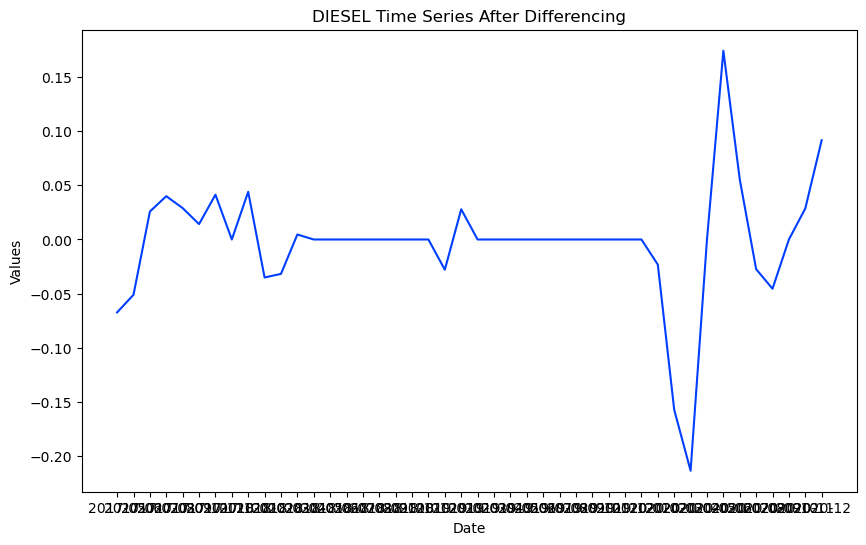

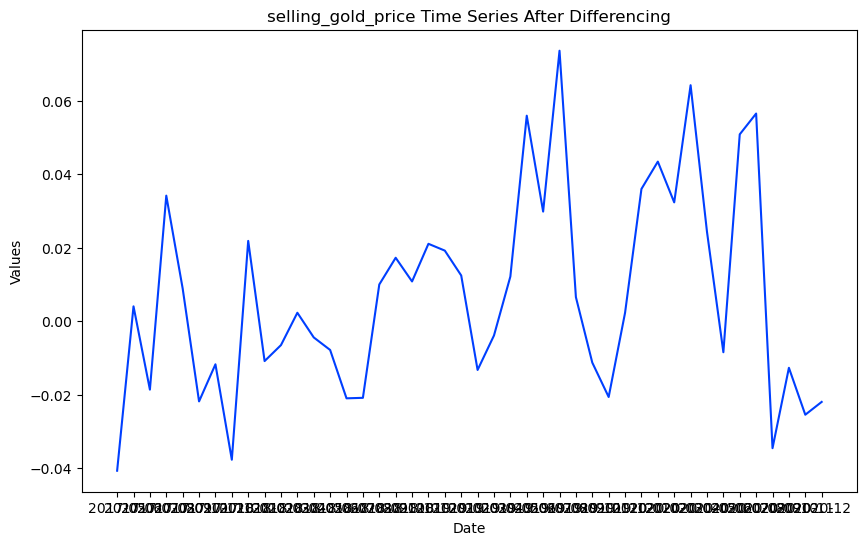

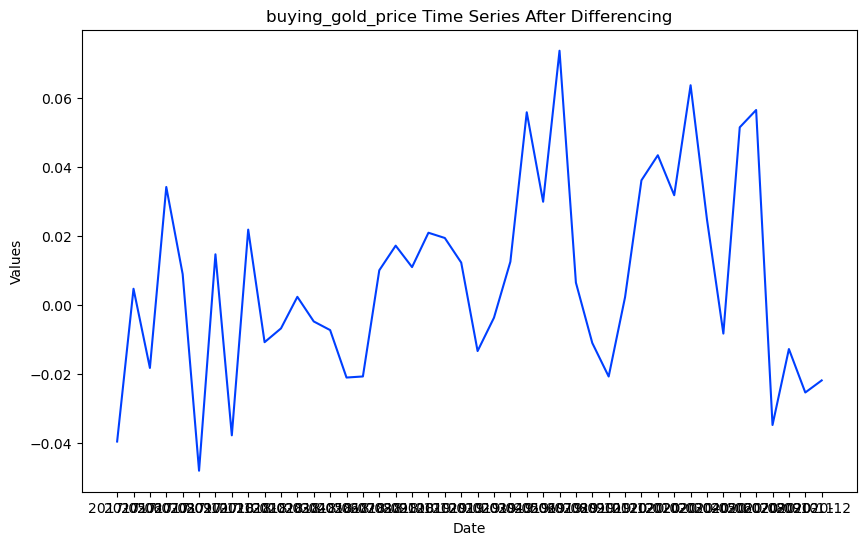

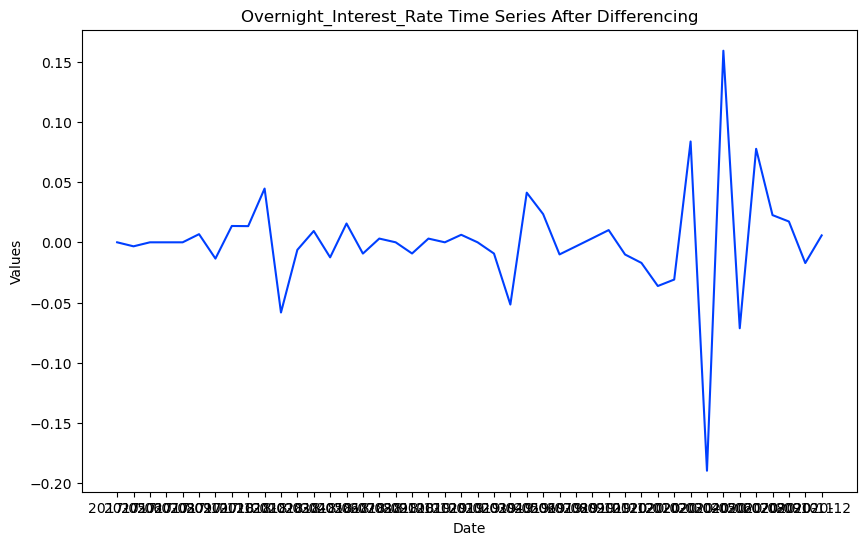

In [68]:
for column in df_train_log_diff.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(df_train_log_diff.index, df_train_log_diff[column])
    plt.title(f'{column} Time Series After Differencing')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.show()

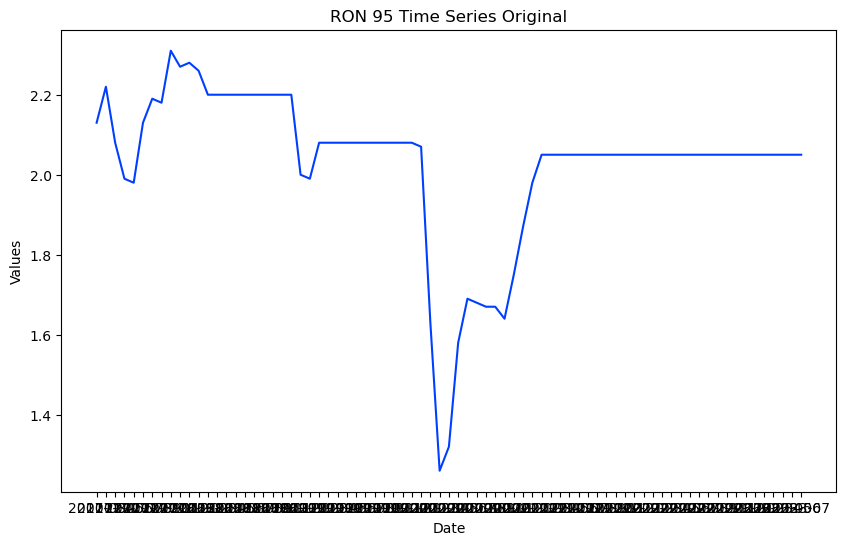

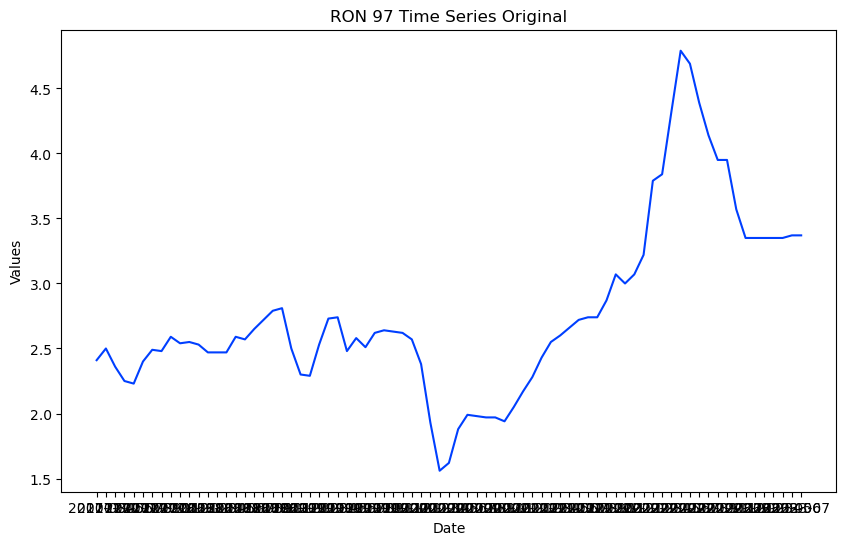

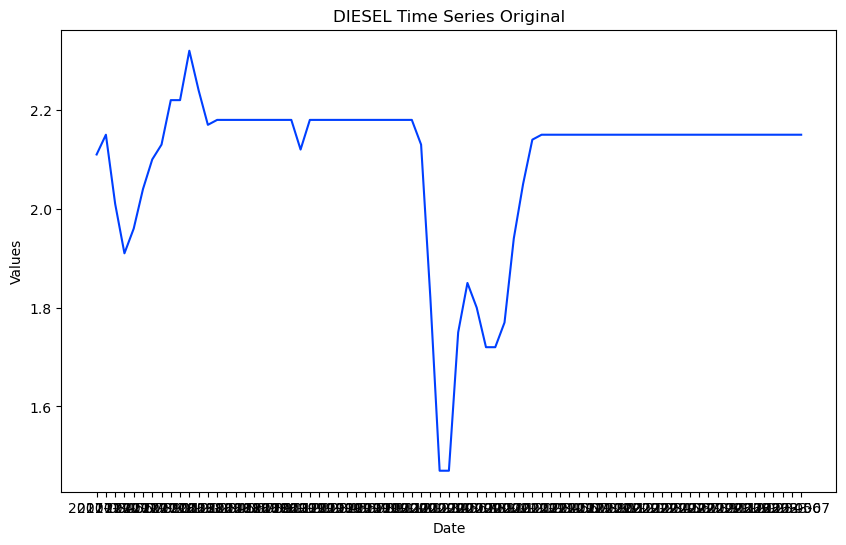

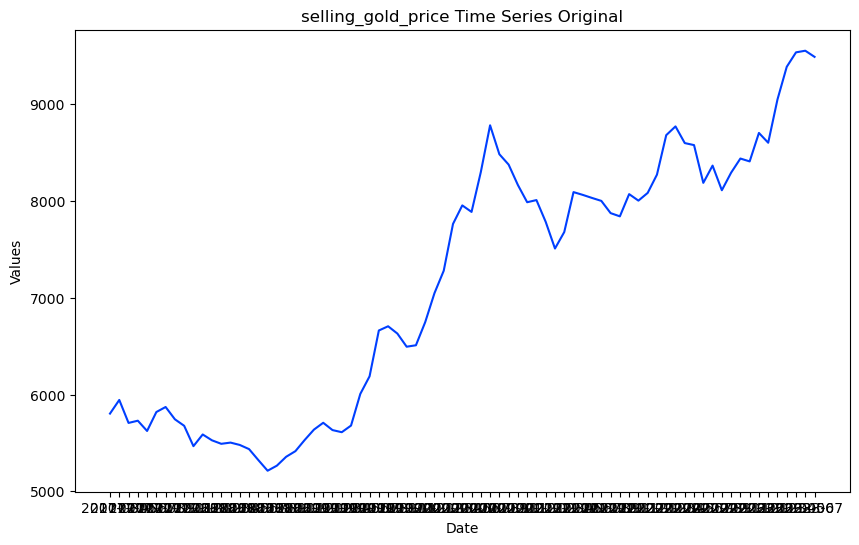

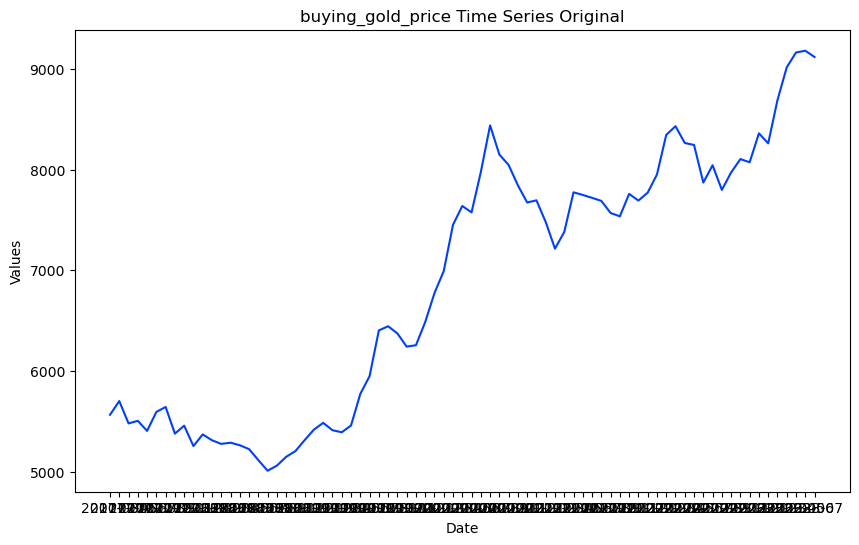

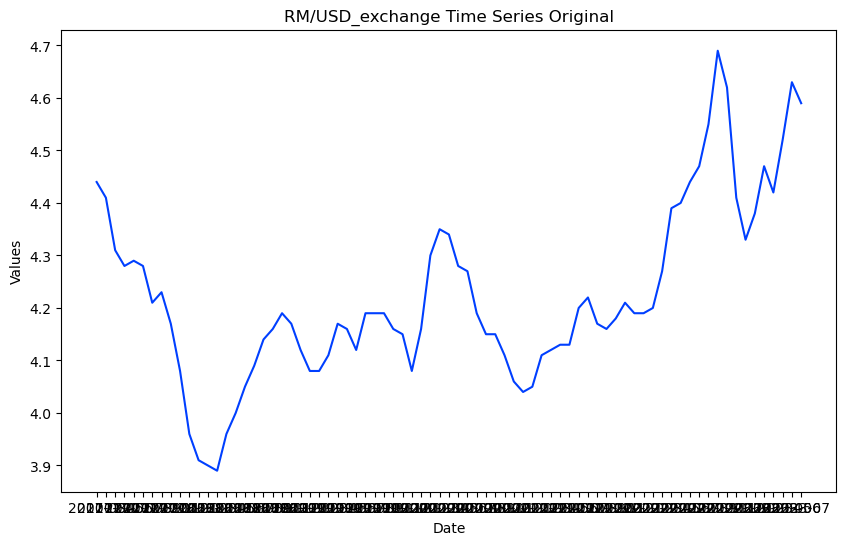

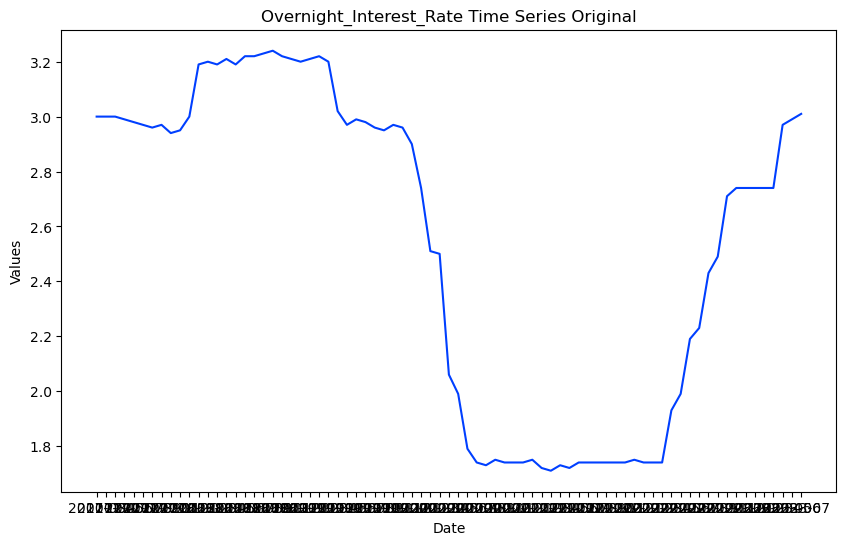

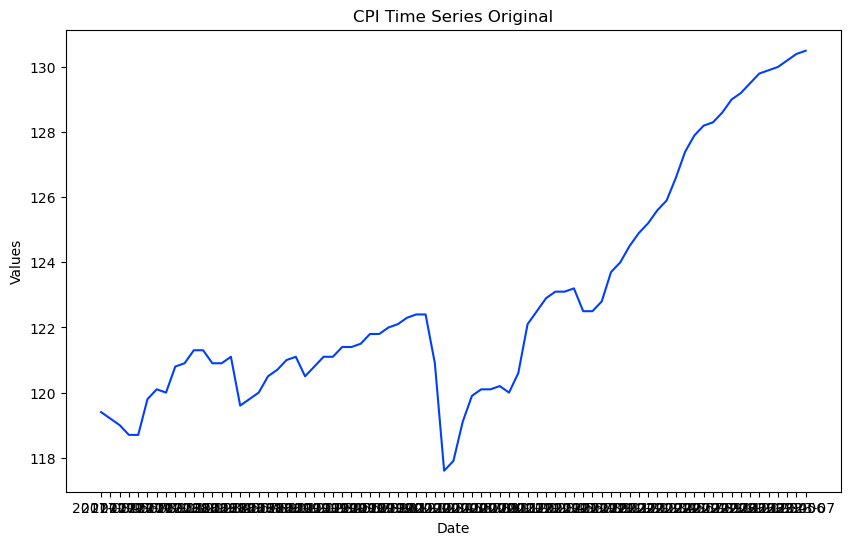

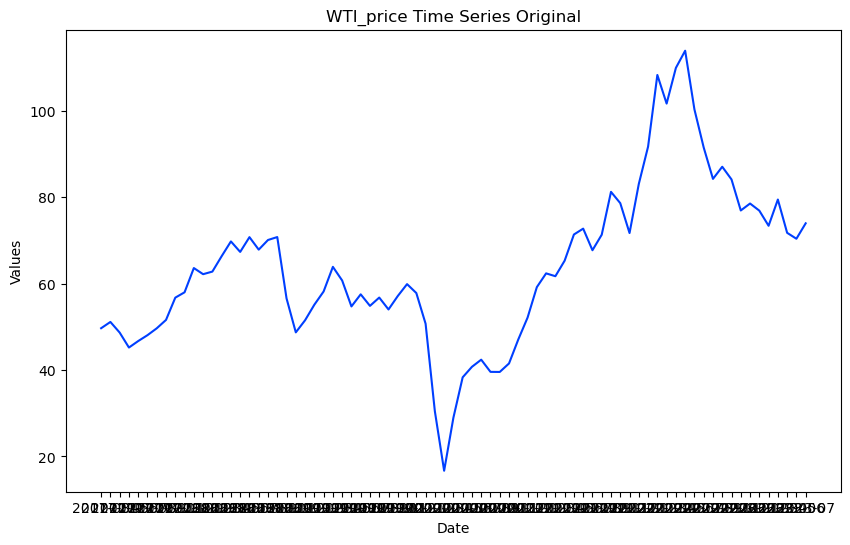

In [69]:
for column in new_data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(new_data.index, new_data[column])
    plt.title(f'{column} Time Series Original')
    plt.xlabel('Date')
    plt.ylabel('Values')
    plt.show()

In [70]:
from statsmodels.tsa.api import VAR

#Initiate VAR model
var_model = VAR(endog=df_train_log_diff)
res_var = var_model.select_order(maxlags=5, trend='ct')
res_var.summary()

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-43.04,-42.53,2.039e-19,-42.85
1,-43.55,-41.50,1.262e-19,-42.82
2,-43.88,-40.30,1.073e-19,-42.59
3,-45.28,-40.16,4.139e-20,-43.44
4,-47.35,-40.70,1.427e-20,-44.97
5,-52.67*,-44.48*,7.690e-22*,-49.73*


In [71]:
var_model_fit = var_model.fit(maxlags=5, ic='aic')
var_model_fit.summary() 

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jun, 2024
Time:                     18:55:05
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -43.4864
Nobs:                     39.0000    HQIC:                  -48.5737
Log likelihood:           856.665    FPE:                1.50657e-21
AIC:                     -51.4203    Det(Omega_mle):     4.50596e-23
--------------------------------------------------------------------
Results for equation RON 95
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.014077         0.009416           -1.495           0.135
L1.RON 95                         -1.944585         0.727669           -2.672           0.008
L1.RON 

In [72]:
from statsmodels.stats.stattools import durbin_watson

dw_check_var = durbin_watson(var_model_fit.resid)

for col, val in zip(df_train_log_diff.columns, dw_check_var):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
RON 95 --> 1.4
----------------------------
Durbin-Watson statistic for:
RON 97 --> 2.51
----------------------------
Durbin-Watson statistic for:
DIESEL --> 1.51
----------------------------
Durbin-Watson statistic for:
selling_gold_price --> 2.14
----------------------------
Durbin-Watson statistic for:
buying_gold_price --> 2.33
----------------------------
Durbin-Watson statistic for:
Overnight_Interest_Rate --> 2.31
----------------------------


In [73]:
############################# prediction part ###############################

In [74]:
#Get the lag order
lag_order = var_model_fit.k_ar
print(lag_order)

5


In [75]:
#Input data for forecasting
pred_input = df_train_log_diff.values[-lag_order:]
pred_input

array([[-0.00593474, -0.00503779, -0.02739897,  0.0565679 ,  0.0564739 ,
         0.07758851],
       [-0.00597017, -0.0050633 , -0.04546237, -0.03462556, -0.034854  ,
         0.0225668 ],
       [ 0.        ,  0.        ,  0.        , -0.01272162, -0.01283249,
         0.01725808],
       [-0.01812738, -0.01534557,  0.02865526, -0.02550688, -0.02543392,
        -0.01722505],
       [ 0.06491955,  0.05515182,  0.09170843, -0.02201442, -0.02192661,
         0.00573067]])

In [76]:
#Forecasting
var_pred = var_model_fit.forecast(y=pred_input, steps=len(df_test))

df_var_pred = pd.DataFrame(var_pred, index = df_test.index, columns = df_train_log_diff.columns + '_1m')

df_var_pred.tail()

,RON 95_1m,RON 97_1m,DIESEL_1m,selling_gold_price_1m,buying_gold_price_1m,Overnight_Interest_Rate_1m
YearMonth,,,,,,
2023-03,-0.079870,-0.109909,-0.017258,-0.093405,-0.099279,-0.001430
2023-04,-0.336304,-0.235175,-0.216070,0.047662,0.049572,-0.057235
2023-05,-0.155696,-0.056910,-0.171268,0.096872,0.107618,-0.097694
2023-06,0.153571,0.166678,0.041188,0.036950,0.034281,-0.022186
2023-07,0.048299,0.090587,0.019035,0.076375,0.067789,0.086707


In [77]:
df_test.tail()

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2023-03,2.05,3.35,2.15,9048.91,8689.61,2.74
2023-04,2.05,3.35,2.15,9386.67,9014.83,2.74
2023-05,2.05,3.35,2.15,9536.10,9162.00,2.97
2023-06,2.05,3.37,2.15,9552.95,9179.75,2.99
2023-07,2.05,3.37,2.15,9489.53,9117.66,3.01


In [78]:
df_var_pred.shape

(31, 6)

In [79]:
import numpy as np
import pandas as pd

# Define invert_transformation function
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        if col == 'Overnight_Interest_Rate':  # Check if the column needs double differencing
            # Roll back 2nd Diff
            df_fc[str(col)+'_forecast'] = (
                np.log(df_train[col].iloc[-2]) +  # Using the second last value for double differencing
                np.log(df_train[col].iloc[-1]) +  # Using the last value for double differencing
                df_fc[str(col)+'_1m'].cumsum().cumsum()  # Double cumsum for double differencing
            )
        else:
            # Roll back 1st Diff
            df_fc[str(col)+'_forecast'] = np.log(df_train[col].iloc[-1]) + df_fc[str(col)+'_1m'].cumsum()
    return df_fc

# Apply invert_transformation function
df_var_pred_inv = invert_transformation(df_train, df_var_pred)

# Filter forecasted columns
df_var_pred_inv = df_var_pred_inv.filter(regex='_forecast$', axis=1)

# Apply exponential transformation
df_var_pred_inv = np.exp(df_var_pred_inv) 

# Output rounded forecasted values
round(df_var_pred_inv.head(), 2)


,RON 95_forecast,RON 97_forecast,DIESEL_forecast,selling_gold_price_forecast,buying_gold_price_forecast,Overnight_Interest_Rate_forecast
YearMonth,,,,,,
2021-01,1.95,2.03,2.12,7416.92,7105.77,2.90
2021-02,1.62,1.70,1.95,7156.00,6821.96,2.89
2021-03,1.33,1.52,1.68,7336.98,7077.09,2.73
2021-04,1.35,1.54,1.63,7431.34,7191.91,2.34
2021-05,1.39,1.69,1.68,7348.26,7065.00,2.20


In [80]:
new_data

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,RM/USD_exchange,Overnight_Interest_Rate,CPI,WTI_price
YearMonth,,,,,,,,,
2017-03,2.13,2.41,2.11,5803.65,5566.04,4.44,3.00,119.4,49.67
2017-04,2.22,2.50,2.15,5944.58,5702.42,4.41,3.00,119.2,51.12
2017-05,2.08,2.36,2.01,5707.10,5480.76,4.31,3.00,119.0,48.66
2017-06,1.99,2.25,1.91,5730.11,5506.28,4.28,2.99,118.7,45.20
2017-07,1.98,2.23,1.96,5624.14,5406.38,4.29,2.98,118.7,46.70
...,...,...,...,...,...,...,...,...,...
2023-03,2.05,3.35,2.15,9048.91,8689.61,4.47,2.74,129.9,73.37
2023-04,2.05,3.35,2.15,9386.67,9014.83,4.42,2.74,130.0,79.44
2023-05,2.05,3.35,2.15,9536.10,9162.00,4.52,2.97,130.2,71.74


In [81]:
from sklearn import metrics

var_mape = metrics.mean_absolute_percentage_error(df_test, df_var_pred_inv)

var_model_accuracy = 1 - var_mape
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(var_model_accuracy, 3)) 

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
0.712


In [82]:
import numpy as np

# Assuming df_test is your actual data and df_var_pred_inv are the predictions from your VAR model

# Calculate MAPE
var_mape = metrics.mean_absolute_percentage_error(df_test, df_var_pred_inv)

# Calculate MAE
var_mae = metrics.mean_absolute_error(df_test, df_var_pred_inv)

# Calculate RMSE
var_rmse = np.sqrt(metrics.mean_squared_error(df_test, df_var_pred_inv))

# Calculate the adjusted accuracy-like metric based on MAPE
var_model_accuracy = 1 - var_mape

# Print all the calculated metrics
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(f"Accuracy: {round(var_model_accuracy, 3)}")
print(f"MAE: {round(var_mae, 3)}")
print(f"RMSE: {round(var_rmse, 3)}")
print(f"MAPE: {round(var_mape, 3)}")

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
Accuracy: 0.712
MAE: 292.51
RMSE: 642.356
MAPE: 0.288


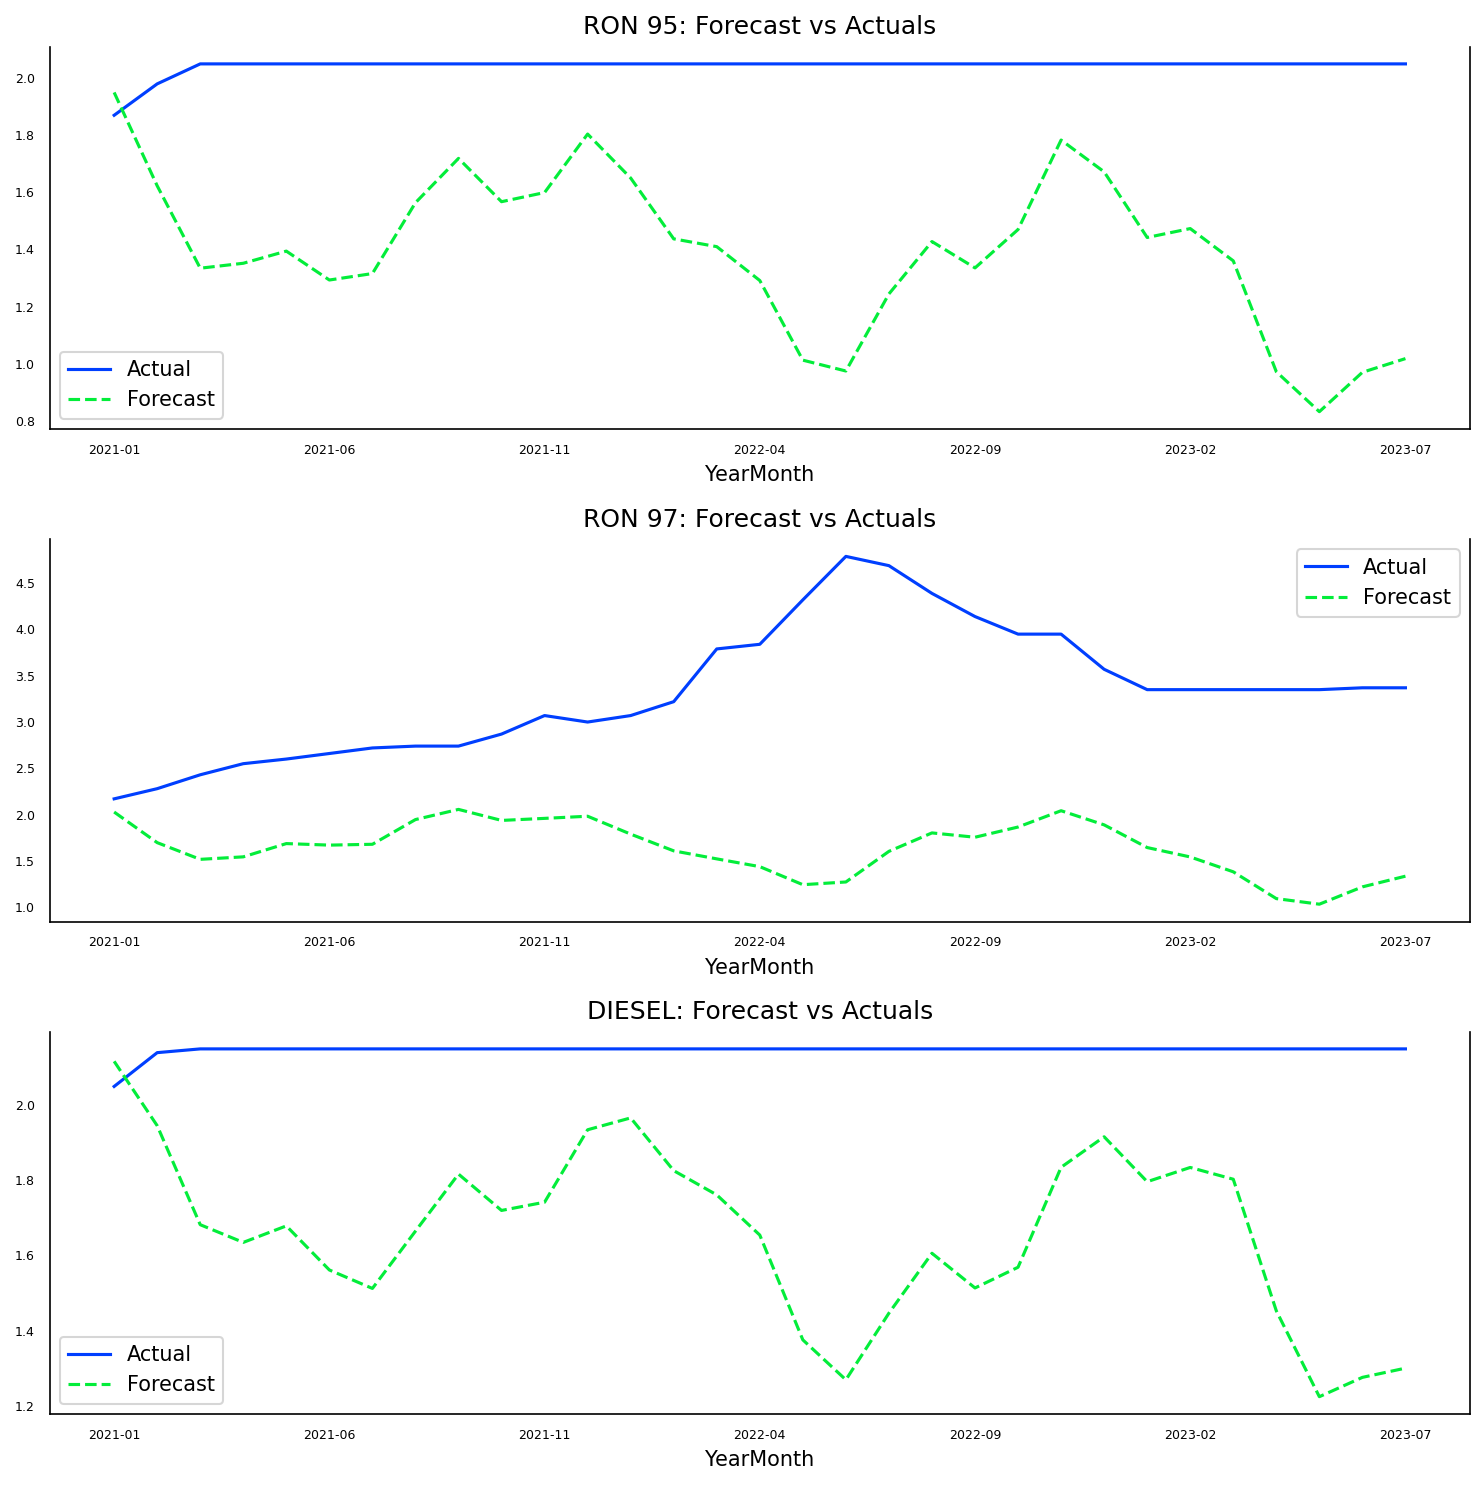

In [83]:
import matplotlib.pyplot as plt

# Specify the columns of interest
columns_of_interest = ['RON 95', 'RON 97', 'DIESEL']

# Create subplots for the specified columns
fig, axes = plt.subplots(nrows= 3, ncols=1, dpi=150, figsize=(10,10))

# Iterate over the specified columns
for i, (col, ax) in enumerate(zip(columns_of_interest, axes.flatten())):
    # Plot actual values from df_test
    df_test[col].plot(legend=True, ax=ax, label='Actual')
    
    # Plot forecasted values from df_var_pred_inv
    df_var_pred_inv[col+'_forecast'].plot(legend=True, ax=ax, linestyle='--', label='Forecast')
    
    # Set title and adjust plot aesthetics
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [84]:
##################### VAR without second differencing and 0.6 train set #####################

In [85]:
df_train

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2017-03,2.13,2.41,2.11,5803.65,5566.04,3.00
2017-04,2.22,2.50,2.15,5944.58,5702.42,3.00
2017-05,2.08,2.36,2.01,5707.10,5480.76,3.00
2017-06,1.99,2.25,1.91,5730.11,5506.28,2.99
2017-07,1.98,2.23,1.96,5624.14,5406.38,2.98
2017-08,2.13,2.40,2.04,5819.77,5594.23,2.97
2017-09,2.19,2.49,2.10,5871.76,5644.12,2.96
2017-10,2.18,2.48,2.13,5744.71,5379.00,2.97
2017-11,2.31,2.59,2.22,5677.50,5458.32,2.94


In [86]:
df_test

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2021-01,1.87,2.17,2.05,8009.74,7694.84,1.74
2021-02,1.98,2.28,2.14,7784.53,7479.84,1.75
2021-03,2.05,2.43,2.15,7509.09,7215.00,1.72
2021-04,2.05,2.55,2.15,7679.48,7380.62,1.71
2021-05,2.05,2.60,2.15,8092.06,7774.18,1.73
2021-06,2.05,2.66,2.15,8063.35,7748.20,1.72
2021-07,2.05,2.72,2.15,8031.61,7719.44,1.74
2021-08,2.05,2.74,2.15,8001.35,7689.40,1.74
2021-09,2.05,2.74,2.15,7875.05,7568.89,1.74


In [87]:
df_train_log.shape

(46, 6)

In [88]:
df_train_log_diff_1 = (df_train_log).diff().dropna()

In [89]:
df_train_log_diff_1.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
Overnight_Interest_Rate    0
dtype: int64

In [90]:
def adf_test(time_series):
    result = adfuller(df_train_log_diff_1[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_train_log_diff_1.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -3.992115
p-value (RON 95): 0.001452
Critical Values:
   1%: -3.60098336718852
   5%: -2.9351348158036012
   10%: -2.6059629803688282
-----------------------------------
ADF Statistic (RON 97): -5.371789
p-value (RON 97): 0.000004
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338
-----------------------------------
ADF Statistic (DIESEL): -6.685676
p-value (DIESEL): 0.000000
Critical Values:
   1%: -3.5925042342183704
   5%: -2.931549768951162
   10%: -2.60406594375338
-----------------------------------
ADF Statistic (selling_gold_price): -4.629189
p-value (selling_gold_price): 0.000114
Critical Values:
   1%: -3.5885733964124715
   5%: -2.929885661157025
   10%: -2.6031845661157025
-----------------------------------
ADF Statistic (buying_gold_price): -5.053061
p-value (buying_gold_price): 0.000017
Critical Values:
   1%: -3.5885733964124715
   5%: -2.929885661157025
   10%: -2.6031845661157025
--------------------

In [91]:
#Initiate VAR model
var_model = VAR(endog=df_train_log_diff_1)
res_var = var_model.select_order(maxlags=5, trend='ct')
res_var.summary()

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-43.86,-43.36*,8.937e-20,-43.68
1,-43.53,-41.50,1.288e-19,-42.80
2,-44.07,-40.52,8.760e-20,-42.78
3,-45.34,-40.27,3.686e-20,-43.51
4,-47.75,-41.17,8.211e-21,-45.37
5,-51.43*,-43.32,1.661e-21*,-48.50*


In [92]:
 var_model_fit = var_model.fit(maxlags=5, ic='aic')
var_model_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jun, 2024
Time:                     18:55:05
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -42.5717
Nobs:                     40.0000    HQIC:                  -47.5855
Log likelihood:           853.955    FPE:                2.77881e-21
AIC:                     -50.4250    Det(Omega_mle):     8.88524e-23
--------------------------------------------------------------------
Results for equation RON 95
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.006637         0.009082           -0.731           0.465
L1.RON 95                         -1.997176         0.632618           -3.157           0.002
L1.RON 

In [93]:
dw_check_var = durbin_watson(var_model_fit.resid)

for col, val in zip(df_train_log_diff.columns, dw_check_var):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
RON 95 --> 1.87
----------------------------
Durbin-Watson statistic for:
RON 97 --> 1.78
----------------------------
Durbin-Watson statistic for:
DIESEL --> 1.88
----------------------------
Durbin-Watson statistic for:
selling_gold_price --> 2.2
----------------------------
Durbin-Watson statistic for:
buying_gold_price --> 2.1
----------------------------
Durbin-Watson statistic for:
Overnight_Interest_Rate --> 2.26
----------------------------


In [94]:
#Get the lag order
lag_order = var_model_fit.k_ar
print(lag_order)

5


In [95]:
#Input data for forecasting
pred_input = df_train_log_diff_1.values[-lag_order:]
pred_input

array([[-0.00593474, -0.00503779, -0.02739897,  0.0565679 ,  0.0564739 ,
        -0.02833051],
       [-0.00597017, -0.0050633 , -0.04546237, -0.03462556, -0.034854  ,
        -0.0057637 ],
       [ 0.        ,  0.        ,  0.        , -0.01272162, -0.01283249,
         0.01149438],
       [-0.01812738, -0.01534557,  0.02865526, -0.02550688, -0.02543392,
        -0.00573067],
       [ 0.06491955,  0.05515182,  0.09170843, -0.02201442, -0.02192661,
         0.        ]])

In [96]:
#Forecasting
var_pred = var_model_fit.forecast(y=pred_input, steps=len(df_test))

df_var_pred = pd.DataFrame(var_pred, index = df_test.index, columns = df_train_log_diff_1.columns + '_1m')

df_var_pred.tail()

,RON 95_1m,RON 97_1m,DIESEL_1m,selling_gold_price_1m,buying_gold_price_1m,Overnight_Interest_Rate_1m
YearMonth,,,,,,
2023-03,-0.042920,-0.039049,-0.031111,0.018304,0.017026,0.001249
2023-04,-0.021247,-0.009383,-0.014360,0.010934,0.010285,-0.015608
2023-05,0.009228,0.007497,0.015372,0.008211,0.009305,-0.028753
2023-06,0.013409,0.019274,0.014792,0.002118,0.002912,-0.019006
2023-07,-0.001935,0.001631,-0.004539,0.013722,0.013167,-0.013427


In [97]:
# inverting transformation: single difference
def invert_transformation(df_train, df_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = np.log(df_train[col].iloc[-1]) + df_fc[str(col)+'_1m'].cumsum()
    return df_fc

In [98]:
df_var_pred_inv = invert_transformation(df_train, df_var_pred)
df_var_pred_inv = df_var_pred_inv.filter(regex='_forecast$',axis=1)
df_var_pred_inv = np.exp(df_var_pred_inv) 

round(df_var_pred_inv.head(), 2)

,RON 95_forecast,RON 97_forecast,DIESEL_forecast,selling_gold_price_forecast,buying_gold_price_forecast,Overnight_Interest_Rate_forecast
YearMonth,,,,,,
2021-01,2.02,2.44,2.12,7498.15,7249.74,1.89
2021-02,2.13,2.68,2.18,7250.96,6951.12,2.00
2021-03,2.12,2.74,2.20,7204.28,6936.45,2.07
2021-04,2.00,2.40,2.10,7165.40,6922.64,2.08
2021-05,1.81,2.20,1.99,7175.46,6912.49,2.21


In [99]:
var_mape = metrics.mean_absolute_percentage_error(df_test, df_var_pred_inv)

var_model_accuracy = 1 - var_mape
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(var_model_accuracy, 3)) 

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
0.837


In [100]:
import numpy as np

# Assuming df_test is your actual data and df_var_pred_inv are the predictions from your VAR model

# Calculate MAPE
var_mape = metrics.mean_absolute_percentage_error(df_test, df_var_pred_inv)

# Calculate MAE
var_mae = metrics.mean_absolute_error(df_test, df_var_pred_inv)

# Calculate RMSE
var_rmse = np.sqrt(metrics.mean_squared_error(df_test, df_var_pred_inv))

# Calculate the adjusted accuracy-like metric based on MAPE
var_model_accuracy = 1 - var_mape

# Print all the calculated metrics
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(f"Accuracy: {round(var_model_accuracy, 3)}")
print(f"MAE: {round(var_mae, 3)}")
print(f"RMSE: {round(var_rmse, 3)}")
print(f"MAPE: {round(var_mape, 3)}")

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
Accuracy: 0.837
MAE: 121.09
RMSE: 249.094
MAPE: 0.163


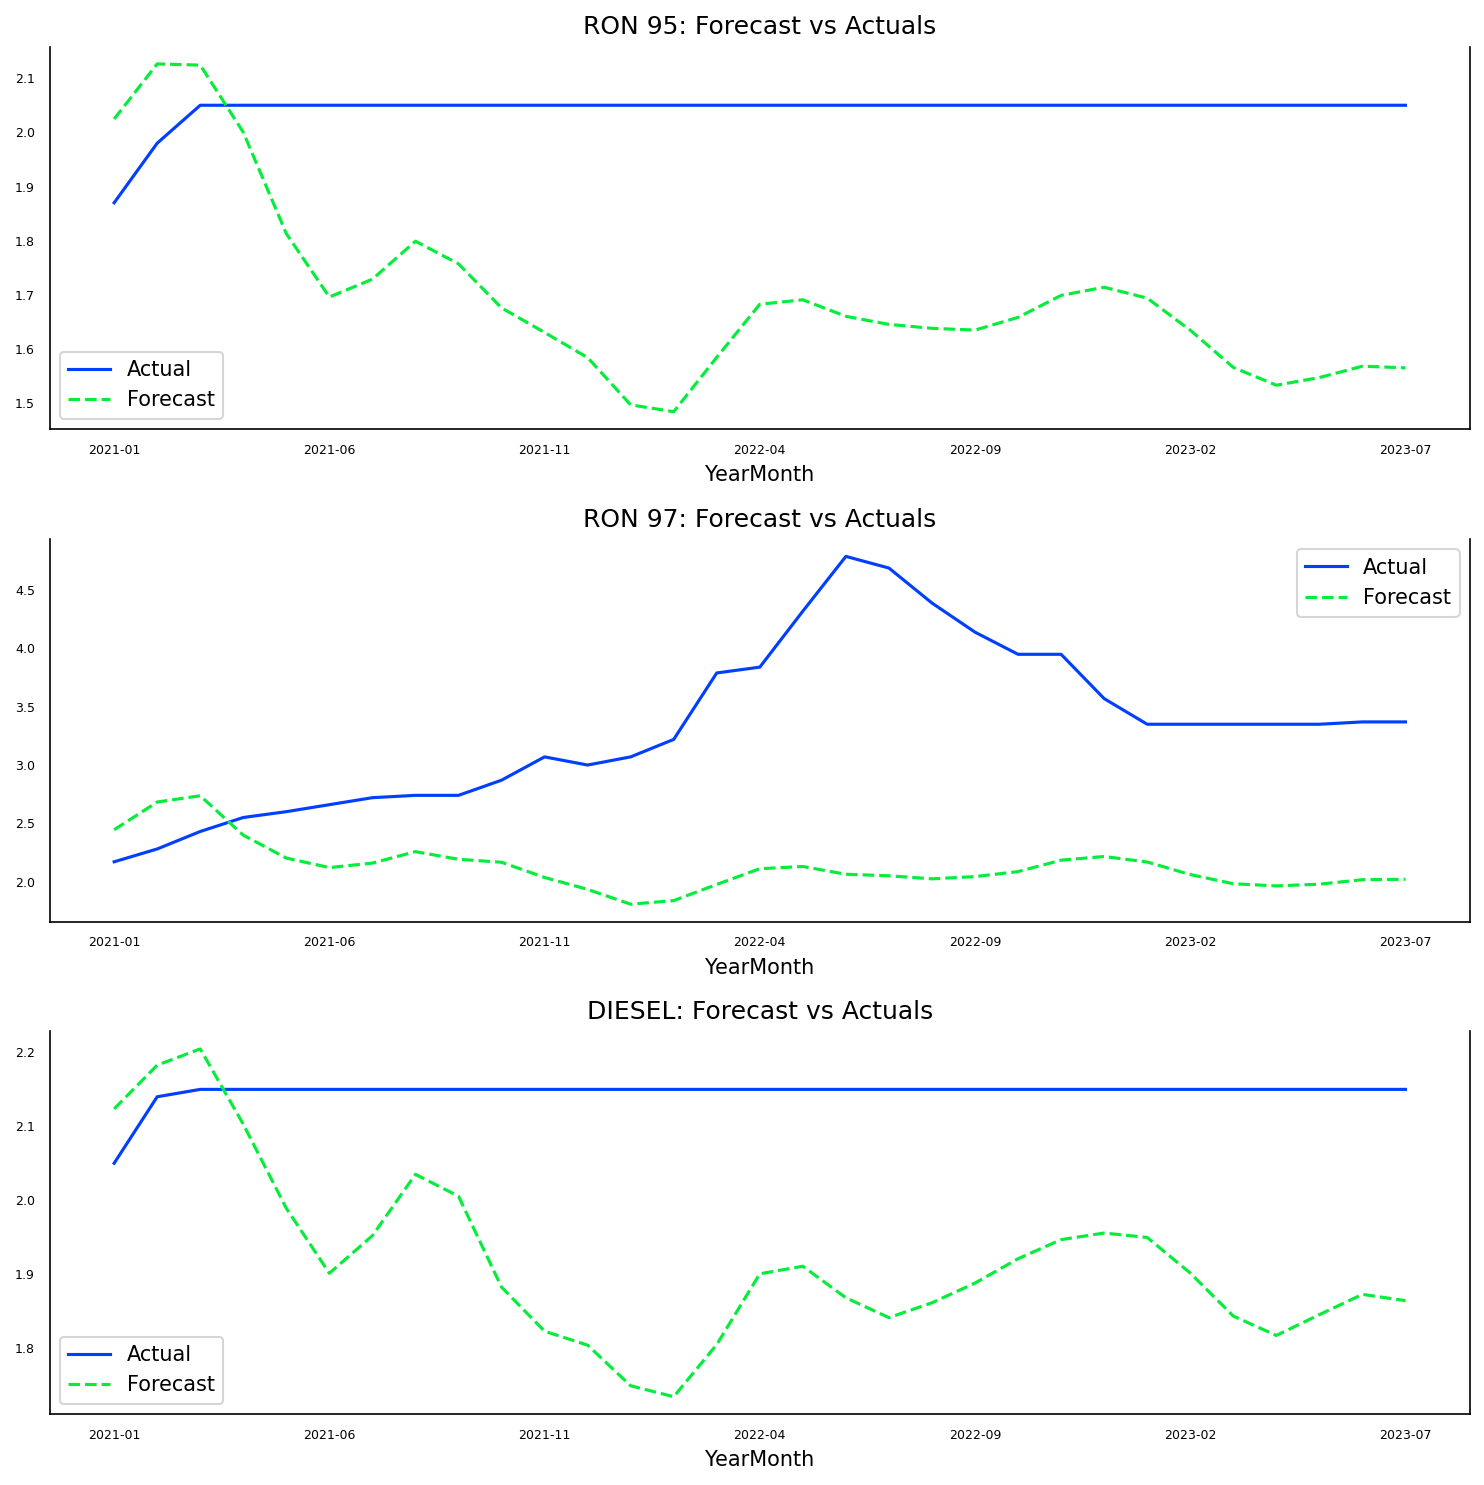

In [101]:
# Specify the columns of interest
columns_of_interest = ['RON 95', 'RON 97', 'DIESEL']

# Create subplots for the specified columns
fig, axes = plt.subplots(nrows= 3, ncols=1, dpi=150, figsize=(10,10))

# Iterate over the specified columns
for i, (col, ax) in enumerate(zip(columns_of_interest, axes.flatten())):
    # Plot actual values from df_test
    df_test[col].plot(legend=True, ax=ax, label='Actual')
    
    # Plot forecasted values from df_var_pred_inv
    df_var_pred_inv[col+'_forecast'].plot(legend=True, ax=ax, linestyle='--', label='Forecast')
    
    # Set title and adjust plot aesthetics
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [102]:
df_test.to_excel('VAR testset 0.6.xlsx',index=True)

In [103]:
df_var_pred_inv.to_excel('VAR predicted 0.6.xlsx',index=True)

In [104]:
##################### VAR without second differencing and 0.7 train set #####################

In [105]:
new_data_copy = new_data[['RON 95', 'RON 97', 'DIESEL','selling_gold_price','buying_gold_price','Overnight_Interest_Rate']].copy()

In [106]:
new_data_copy

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2017-03,2.13,2.41,2.11,5803.65,5566.04,3.00
2017-04,2.22,2.50,2.15,5944.58,5702.42,3.00
2017-05,2.08,2.36,2.01,5707.10,5480.76,3.00
2017-06,1.99,2.25,1.91,5730.11,5506.28,2.99
2017-07,1.98,2.23,1.96,5624.14,5406.38,2.98
...,...,...,...,...,...,...
2023-03,2.05,3.35,2.15,9048.91,8689.61,2.74
2023-04,2.05,3.35,2.15,9386.67,9014.83,2.74
2023-05,2.05,3.35,2.15,9536.10,9162.00,2.97


In [107]:
0.7*77

53.9

In [108]:
df_train_7 = new_data_copy[0:54]
df_test_7 = new_data_copy[54:]

In [109]:
df_train_7.shape

(54, 6)

In [110]:
df_test_7.shape

(23, 6)

In [111]:
df_train_log_7 = np.log(df_train_7)

In [112]:
def adf_test(time_series):
    result = adfuller(df_train_log_7[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_train_log_7.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -1.829996
p-value (RON 95): 0.365675
Critical Values:
   1%: -3.568485864
   5%: -2.92135992
   10%: -2.5986616
-----------------------------------
ADF Statistic (RON 97): -1.918091
p-value (RON 97): 0.323599
Critical Values:
   1%: -3.5656240522121956
   5%: -2.920142229157715
   10%: -2.598014675124952
-----------------------------------
ADF Statistic (DIESEL): -1.740684
p-value (DIESEL): 0.410282
Critical Values:
   1%: -3.5656240522121956
   5%: -2.920142229157715
   10%: -2.598014675124952
-----------------------------------
ADF Statistic (selling_gold_price): -0.402675
p-value (selling_gold_price): 0.909651
Critical Values:
   1%: -3.562878534649522
   5%: -2.918973284023669
   10%: -2.597393446745562
-----------------------------------
ADF Statistic (buying_gold_price): -0.337773
p-value (buying_gold_price): 0.919982
Critical Values:
   1%: -3.562878534649522
   5%: -2.918973284023669
   10%: -2.597393446745562
-----------------------------------
ADF Stat

In [113]:
df_train_log_diff_7 = (df_train_log_7).diff().dropna()

In [114]:
df_train_log_diff_7.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
Overnight_Interest_Rate    0
dtype: int64

In [115]:
#Initiate VAR model
var_model_1 = VAR(endog=df_train_log_diff_7)
res_var_1 = var_model_1.select_order(maxlags=5, trend='ct')
res_var_1.summary()

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-44.48,-44.02*,4.795e-20,-44.31*
1,-44.35,-42.48,5.576e-20,-43.64
2,-44.87,-41.60,3.612e-20,-43.63
3,-45.47,-40.79,2.479e-20,-43.70
4,-46.37,-40.29,1.581e-20*,-44.07
5,-47.02*,-39.54,1.988e-20,-44.19


In [116]:
 var_model_fit_1 = var_model_1.fit(maxlags=5, ic='aic')
var_model_fit_1.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jun, 2024
Time:                     18:55:06
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -39.0243
Nobs:                     48.0000    HQIC:                  -43.5351
Log likelihood:           887.951    FPE:                3.46909e-20
AIC:                     -46.2752    Det(Omega_mle):     1.74542e-21
--------------------------------------------------------------------
Results for equation RON 95
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.010622         0.010491           -1.013           0.311
L1.RON 95                         -0.987253         0.523898           -1.884           0.060
L1.RON 

In [117]:
dw_check_var_1 = durbin_watson(var_model_fit_1.resid)

for col, val in zip(df_train_log_diff_7.columns, dw_check_var_1):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
RON 95 --> 1.74
----------------------------
Durbin-Watson statistic for:
RON 97 --> 1.95
----------------------------
Durbin-Watson statistic for:
DIESEL --> 1.55
----------------------------
Durbin-Watson statistic for:
selling_gold_price --> 2.15
----------------------------
Durbin-Watson statistic for:
buying_gold_price --> 2.1
----------------------------
Durbin-Watson statistic for:
Overnight_Interest_Rate --> 2.17
----------------------------


In [118]:
#Get the lag order
lag_order = var_model_fit_1.k_ar
print(lag_order)

5


In [119]:
#Input data for forecasting
pred_input_1 = df_train_log_diff_7.values[-lag_order:]
pred_input_1

array([[ 0.        ,  0.0482021 ,  0.        ,  0.02243755,  0.02269545,
        -0.00583092],
       [ 0.        ,  0.01941809,  0.        ,  0.0523315 ,  0.05195034,
         0.01162804],
       [ 0.        ,  0.02281468,  0.        , -0.00355423, -0.00334743,
        -0.00579712],
       [ 0.        ,  0.02230576,  0.        , -0.0039441 , -0.00371874,
         0.01156082],
       [ 0.        ,  0.00732604,  0.        , -0.00377473, -0.00389907,
         0.        ]])

In [120]:
#Forecasting
var_pred_1 = var_model_fit_1.forecast(y=pred_input_1, steps=len(df_test_7))

df_var_pred_1 = pd.DataFrame(var_pred_1, index = df_test_7.index, columns = df_train_log_diff_7.columns + '_1m')

df_var_pred_1.tail()

,RON 95_1m,RON 97_1m,DIESEL_1m,selling_gold_price_1m,buying_gold_price_1m,Overnight_Interest_Rate_1m
YearMonth,,,,,,
2023-03,-0.005316,0.001723,-0.002300,0.002699,0.002970,-0.009720
2023-04,0.002291,0.001299,0.006641,0.004555,0.004854,-0.013694
2023-05,0.007192,0.006031,0.009570,0.011214,0.011495,-0.011237
2023-06,0.002511,0.002022,0.002096,0.013361,0.013466,-0.009068
2023-07,-0.006942,-0.002402,-0.007074,0.011654,0.011266,-0.010160


In [121]:
# inverting transformation: single difference
def invert_transformation(df_train_7, df_forecast_1):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc_1 = df_forecast_1.copy()
    columns = df_train_7.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc_1[str(col)+'_forecast'] = np.log(df_train_7[col].iloc[-1]) + df_fc_1[str(col)+'_1m'].cumsum()
    return df_fc_1

In [122]:
df_var_pred_inv_1 = invert_transformation(df_train_7, df_var_pred_1)
df_var_pred_inv_1 = df_var_pred_inv_1.filter(regex='_forecast$',axis=1)
df_var_pred_inv_1 = np.exp(df_var_pred_inv_1) 

round(df_var_pred_inv_1.head(), 2)

,RON 95_forecast,RON 97_forecast,DIESEL_forecast,selling_gold_price_forecast,buying_gold_price_forecast,Overnight_Interest_Rate_forecast
YearMonth,,,,,,
2021-09,2.09,2.78,2.18,8199.45,7879.87,1.74
2021-10,2.08,2.72,2.17,8509.36,8213.28,1.72
2021-11,1.95,2.53,2.07,8758.59,8411.62,1.72
2021-12,1.82,2.41,1.96,8953.81,8604.52,1.70
2022-01,1.78,2.37,1.91,8961.46,8610.72,1.67


In [123]:
var_mape_1 = metrics.mean_absolute_percentage_error(df_test_7, df_var_pred_inv_1)

var_model_accuracy_1 = 1 - var_mape_1
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(var_model_accuracy_1, 3)) 

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
0.838


In [124]:
# Calculate MAPE
var_mape_1 = metrics.mean_absolute_percentage_error(df_test_7, df_var_pred_inv_1)

# Calculate MAE
var_mae_1 = metrics.mean_absolute_error(df_test_7, df_var_pred_inv_1)

# Calculate RMSE
var_rmse_1 = np.sqrt(metrics.mean_squared_error(df_test_7, df_var_pred_inv_1))

# Calculate the adjusted accuracy-like metric based on MAPE
var_model_accuracy_1 = 1 - var_mape_1

# Print all the calculated metrics
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(f"Accuracy: {round(var_model_accuracy_1, 3)}")
print(f"MAE: {round(var_mae_1, 3)}")
print(f"RMSE: {round(var_rmse_1, 3)}")
print(f"MAPE: {round(var_mape_1, 3)}")

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
Accuracy: 0.838
MAE: 324.857
RMSE: 595.574
MAPE: 0.162


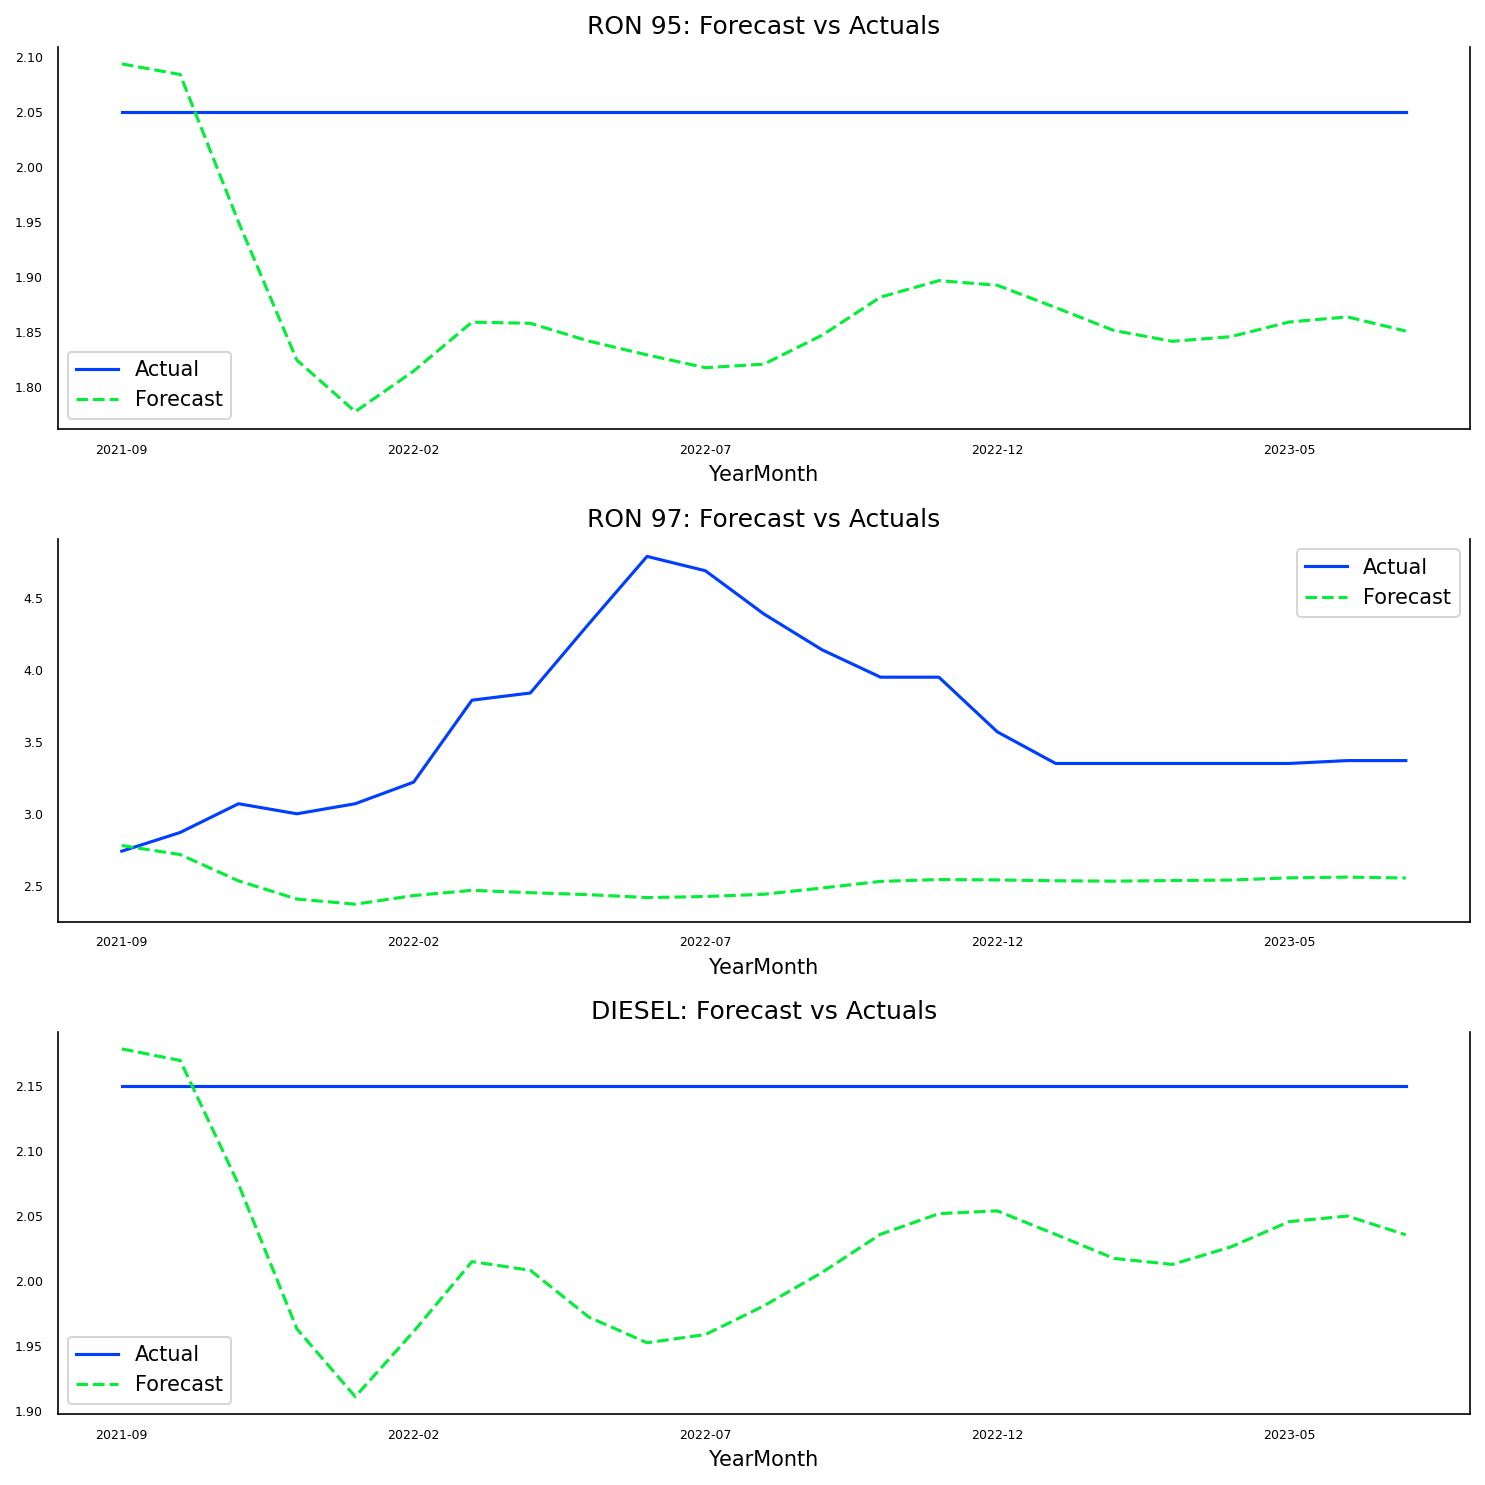

In [125]:
# Specify the columns of interest
columns_of_interest = ['RON 95', 'RON 97', 'DIESEL']

# Create subplots for the specified columns
fig, axes = plt.subplots(nrows= 3, ncols=1, dpi=150, figsize=(10,10))

# Iterate over the specified columns
for i, (col, ax) in enumerate(zip(columns_of_interest, axes.flatten())):
    # Plot actual values from df_test
    df_test_7[col].plot(legend=True, ax=ax, label='Actual')
    
    # Plot forecasted values from df_var_pred_inv
    df_var_pred_inv_1[col+'_forecast'].plot(legend=True, ax=ax, linestyle='--', label='Forecast')
    
    # Set title and adjust plot aesthetics
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [126]:
df_var_pred_inv_1.to_excel('VAR predicted 0.7.xlsx',index=True)

In [127]:
df_test_7.to_excel('VAR testset 0.7.xlsx',index=True)

In [128]:
##################### VAR without second differencing and 0.8 train set #####################

In [129]:
new_data_copy

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2017-03,2.13,2.41,2.11,5803.65,5566.04,3.00
2017-04,2.22,2.50,2.15,5944.58,5702.42,3.00
2017-05,2.08,2.36,2.01,5707.10,5480.76,3.00
2017-06,1.99,2.25,1.91,5730.11,5506.28,2.99
2017-07,1.98,2.23,1.96,5624.14,5406.38,2.98
...,...,...,...,...,...,...
2023-03,2.05,3.35,2.15,9048.91,8689.61,2.74
2023-04,2.05,3.35,2.15,9386.67,9014.83,2.74
2023-05,2.05,3.35,2.15,9536.10,9162.00,2.97


In [130]:
0.8*77

61.6

In [131]:
df_train_8 = new_data_copy[0:62]
df_test_8 = new_data_copy[62:]

In [132]:
df_train_8.shape

(62, 6)

In [133]:
df_test_8.shape

(15, 6)

In [134]:
df_train_log_8 = np.log(df_train_8)

In [135]:
def adf_test(time_series):
    result = adfuller(df_train_log_8[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_train_log_8.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -1.978114
p-value (RON 95): 0.296251
Critical Values:
   1%: -3.548493559596539
   5%: -2.912836594776334
   10%: -2.594129155766944
-----------------------------------
ADF Statistic (RON 97): -1.011397
p-value (RON 97): 0.749085
Critical Values:
   1%: -3.5463945337644063
   5%: -2.911939409384601
   10%: -2.5936515282964665
-----------------------------------
ADF Statistic (DIESEL): -2.046348
p-value (DIESEL): 0.266628
Critical Values:
   1%: -3.548493559596539
   5%: -2.912836594776334
   10%: -2.594129155766944
-----------------------------------
ADF Statistic (selling_gold_price): -0.157176
p-value (selling_gold_price): 0.943437
Critical Values:
   1%: -3.5443688564814813
   5%: -2.9110731481481484
   10%: -2.5931902777777776
-----------------------------------
ADF Statistic (buying_gold_price): -0.094673
p-value (buying_gold_price): 0.949967
Critical Values:
   1%: -3.5443688564814813
   5%: -2.9110731481481484
   10%: -2.5931902777777776
-----------------

In [136]:
df_train_log_diff_8 = (df_train_log_8).diff().dropna()

In [137]:
df_train_log_diff_8.isnull().sum()

RON 95                     0
RON 97                     0
DIESEL                     0
selling_gold_price         0
buying_gold_price          0
Overnight_Interest_Rate    0
dtype: int64

In [138]:
#Initiate VAR model
var_model_2 = VAR(endog=df_train_log_diff_8)
res_var_2 = var_model_2.select_order(maxlags=5, trend='ct')
res_var_2.summary()

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-44.82,-44.38*,3.433e-20,-44.65*
1,-44.74,-43.01,3.751e-20,-44.07
2,-45.34,-42.30,2.176e-20,-44.16
3,-45.97,-41.63,1.326e-20,-44.28
4,-46.63*,-40.99,8.876e-21*,-44.45
5,-46.56,-39.62,1.533e-20,-43.87


In [139]:
 var_model_fit_2 = var_model_2.fit(maxlags=4, ic='aic')
var_model_fit_2.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jun, 2024
Time:                     18:55:06
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -40.7739
Nobs:                     57.0000    HQIC:                  -44.0609
Log likelihood:           980.009    FPE:                1.32851e-20
AIC:                     -46.1504    Det(Omega_mle):     1.49876e-21
--------------------------------------------------------------------
Results for equation RON 95
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                             -0.008897         0.007711           -1.154           0.249
L1.RON 95                         -0.431836         0.407461           -1.060           0.289
L1.RON 

In [140]:
dw_check_var_2 = durbin_watson(var_model_fit_2.resid)

for col, val in zip(df_train_log_diff_8.columns, dw_check_var_2):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
RON 95 --> 2.06
----------------------------
Durbin-Watson statistic for:
RON 97 --> 1.82
----------------------------
Durbin-Watson statistic for:
DIESEL --> 2.03
----------------------------
Durbin-Watson statistic for:
selling_gold_price --> 2.04
----------------------------
Durbin-Watson statistic for:
buying_gold_price --> 2.02
----------------------------
Durbin-Watson statistic for:
Overnight_Interest_Rate --> 1.61
----------------------------


In [141]:
#Get the lag order
lag_order = var_model_fit_2.k_ar
print(lag_order)

4


In [142]:
#Input data for forecasting
pred_input_2 = df_train_log_diff_8.values[-lag_order:]
pred_input_2

array([[ 0.        ,  0.02306527,  0.        ,  0.00992312,  0.01019439,
         0.00573067],
       [ 0.        ,  0.0477038 ,  0.        ,  0.02307948,  0.02288323,
        -0.00573067],
       [ 0.        ,  0.16298466,  0.        ,  0.04812936,  0.04823746,
         0.        ],
       [ 0.        ,  0.01310635,  0.        ,  0.01038315,  0.01030981,
         0.        ]])

In [143]:
#Forecasting
var_pred_2 = var_model_fit_2.forecast(y=pred_input_2, steps=len(df_test_8))

df_var_pred_2 = pd.DataFrame(var_pred_2, index = df_test_8.index, columns = df_train_log_diff_8.columns + '_1m')

df_var_pred_2.tail()

,RON 95_1m,RON 97_1m,DIESEL_1m,selling_gold_price_1m,buying_gold_price_1m,Overnight_Interest_Rate_1m
YearMonth,,,,,,
2023-03,-0.029601,-0.019935,-0.026899,0.002294,0.002176,-0.008815
2023-04,-0.022916,-0.016351,-0.009457,0.011773,0.013715,-0.016891
2023-05,0.000374,0.011920,0.006373,0.016352,0.015510,-0.007873
2023-06,0.023796,0.034295,0.019535,0.013051,0.012939,-0.011487
2023-07,0.016599,0.028084,0.010278,0.003923,0.002855,-0.007234


In [144]:
# inverting transformation: single difference
def invert_transformation(df_train_8, df_forecast_2):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc_2 = df_forecast_2.copy()
    columns = df_train_8.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc_2[str(col)+'_forecast'] = np.log(df_train_8[col].iloc[-1]) + df_fc_2[str(col)+'_1m'].cumsum()
    return df_fc_2

In [145]:
df_var_pred_inv_2 = invert_transformation(df_train_8, df_var_pred_2)
df_var_pred_inv_2 = df_var_pred_inv_2.filter(regex='_forecast$',axis=1)
df_var_pred_inv_2 = np.exp(df_var_pred_inv_2) 

round(df_var_pred_inv_2.head(), 2)

,RON 95_forecast,RON 97_forecast,DIESEL_forecast,selling_gold_price_forecast,buying_gold_price_forecast,Overnight_Interest_Rate_forecast
YearMonth,,,,,,
2022-05,2.10,3.90,2.17,8621.43,8273.78,1.76
2022-06,2.17,3.90,2.27,8672.72,8377.50,1.78
2022-07,2.23,4.11,2.34,8938.46,8605.61,1.84
2022-08,2.26,4.26,2.38,9112.61,8778.07,1.87
2022-09,2.18,4.29,2.29,8907.24,8541.35,1.94


In [146]:
var_mape_2 = metrics.mean_absolute_percentage_error(df_test_8, df_var_pred_inv_2)

var_model_accuracy_2 = 1 - var_mape_2
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(round(var_model_accuracy_2, 3)) 

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
0.886


In [147]:
# Calculate MAPE
var_mape_2 = metrics.mean_absolute_percentage_error(df_test_8, df_var_pred_inv_2)

# Calculate MAE
var_mae_2 = metrics.mean_absolute_error(df_test_8, df_var_pred_inv_2)

# Calculate RMSE
var_rmse_2 = np.sqrt(metrics.mean_squared_error(df_test_8, df_var_pred_inv_2))

# Calculate the adjusted accuracy-like metric based on MAPE
var_model_accuracy_2 = 1 - var_mape_2

# Print all the calculated metrics
print("The accuracy of the VAR out-of-sample prediction is:")
print("----------------------------------------------------")
print(f"Accuracy: {round(var_model_accuracy_2, 3)}")
print(f"MAE: {round(var_mae_2, 3)}")
print(f"RMSE: {round(var_rmse_2, 3)}")
print(f"MAPE: {round(var_mape_2, 3)}")

The accuracy of the VAR out-of-sample prediction is:
----------------------------------------------------
Accuracy: 0.886
MAE: 124.086
RMSE: 263.848
MAPE: 0.114


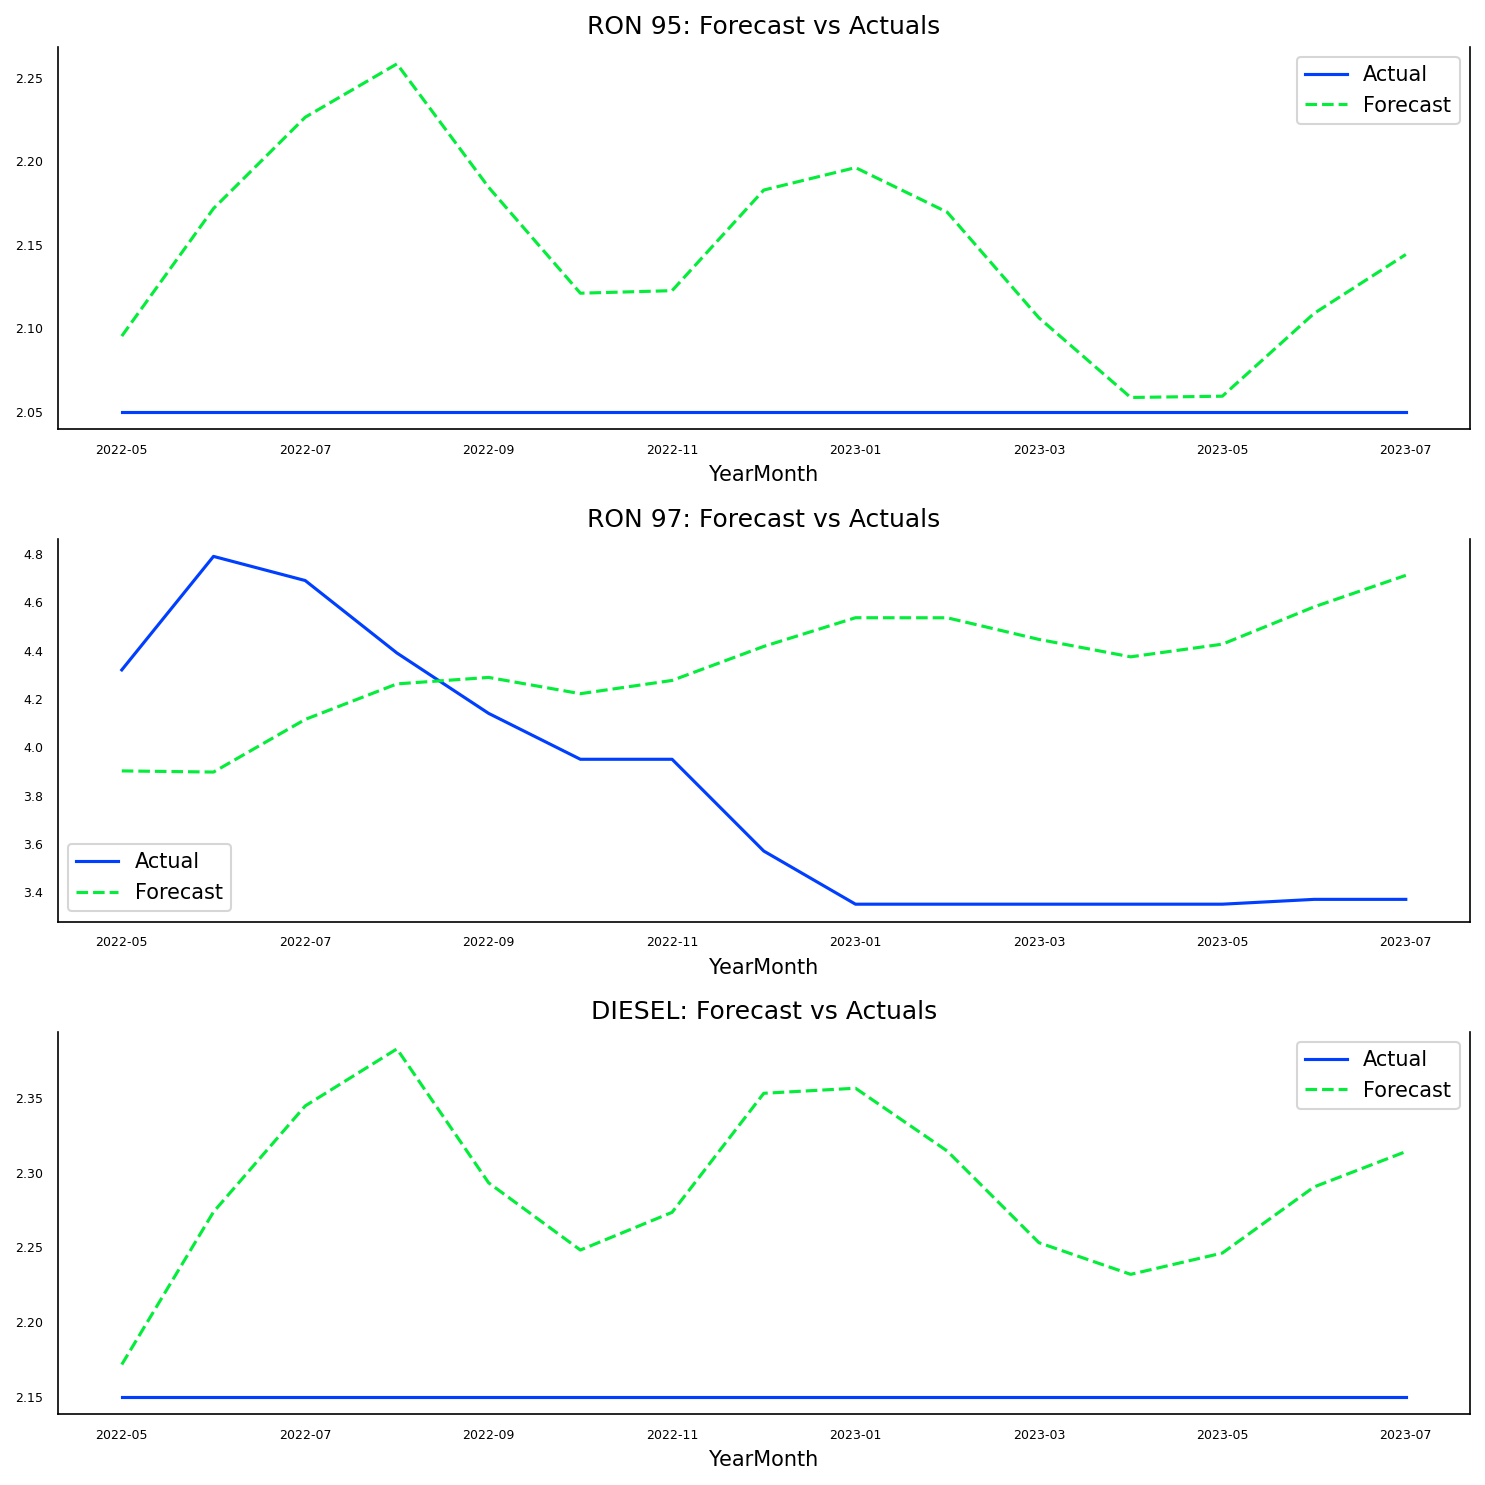

In [148]:
# Specify the columns of interest
columns_of_interest = ['RON 95', 'RON 97', 'DIESEL']

# Create subplots for the specified columns
fig, axes = plt.subplots(nrows= 3, ncols=1, dpi=150, figsize=(10,10))

# Iterate over the specified columns
for i, (col, ax) in enumerate(zip(columns_of_interest, axes.flatten())):
    # Plot actual values from df_test
    df_test_8[col].plot(legend=True, ax=ax, label='Actual')
    
    # Plot forecasted values from df_var_pred_inv
    df_var_pred_inv_2[col+'_forecast'].plot(legend=True, ax=ax, linestyle='--', label='Forecast')
    
    # Set title and adjust plot aesthetics
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [149]:
df_test_8.to_excel('VAR testset 0.8.xlsx',index=True)

In [150]:
df_var_pred_inv_2.to_excel('VAR predicted 0.8.xlsx',index=True)

In [151]:
##################### VAR without second differencing, using all data + forecasting #####################

In [152]:
new_data_copy

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
YearMonth,,,,,,
2017-03,2.13,2.41,2.11,5803.65,5566.04,3.00
2017-04,2.22,2.50,2.15,5944.58,5702.42,3.00
2017-05,2.08,2.36,2.01,5707.10,5480.76,3.00
2017-06,1.99,2.25,1.91,5730.11,5506.28,2.99
2017-07,1.98,2.23,1.96,5624.14,5406.38,2.98
...,...,...,...,...,...,...
2023-03,2.05,3.35,2.15,9048.91,8689.61,2.74
2023-04,2.05,3.35,2.15,9386.67,9014.83,2.74
2023-05,2.05,3.35,2.15,9536.10,9162.00,2.97


In [153]:
fc_window = ['2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', 
             '2024-03', '2024-04', '2024-05', '2024-06', '2024-07']

In [154]:
df_log= np.log(new_data_copy)
df_log_diff = df_log.diff().dropna()

In [155]:
def adf_test(time_series):
    result = adfuller(df_log_diff[time_series], autolag="AIC")
    # Extract and print the test statistic, p-value, and critical values
    print('ADF Statistic (%s): %f' % (time_series, result[0]))
    print('p-value (%s): %f' % (time_series, result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'   {key}: {value}')
        
# Perform ADF test for all the time series
for col in df_log_diff.columns:
    adf_test(col)
    print('-----------------------------------')

ADF Statistic (RON 95): -5.178023
p-value (RON 95): 0.000010
Critical Values:
   1%: -3.524624466842421
   5%: -2.9026070739026064
   10%: -2.5886785262345677
-----------------------------------
ADF Statistic (RON 97): -5.755584
p-value (RON 97): 0.000001
Critical Values:
   1%: -3.5219803175527606
   5%: -2.9014701097664504
   10%: -2.58807215485756
-----------------------------------
ADF Statistic (DIESEL): -5.535820
p-value (DIESEL): 0.000002
Critical Values:
   1%: -3.5232835753964475
   5%: -2.902030597326081
   10%: -2.5883710883843123
-----------------------------------
ADF Statistic (selling_gold_price): -6.849297
p-value (selling_gold_price): 0.000000
Critical Values:
   1%: -3.520713130074074
   5%: -2.9009249540740742
   10%: -2.5877813777777776
-----------------------------------
ADF Statistic (buying_gold_price): -7.209869
p-value (buying_gold_price): 0.000000
Critical Values:
   1%: -3.520713130074074
   5%: -2.9009249540740742
   10%: -2.5877813777777776
----------------

In [156]:
var_model_fc = VAR(endog=df_log_diff)
res_var_fc = var_model_fc.select_order(maxlags=5, trend='ct')
res_var_fc.summary()

/Users/sitinurularisya/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,-45.05,-44.67*,2.711e-20,-44.90*
1,-45.10,-43.57,2.602e-20,-44.49
2,-45.84,-43.16,1.277e-20,-44.77
3,-46.03,-42.20,1.125e-20*,-44.51
4,-46.06*,-41.09,1.232e-20,-44.08
5,-45.82,-39.70,1.911e-20,-43.39


In [157]:
#Fitting the model
var_model_fc_fit = var_model_fc.fit(maxlags=4, ic='aic')
var_model_fc_fit.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 30, Jun, 2024
Time:                     18:55:07
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                   -42.5309
Nobs:                     73.0000    HQIC:                  -44.6824
Log likelihood:           1175.44    FPE:                1.01759e-20
AIC:                     -46.1078    Det(Omega_mle):     2.53969e-21
--------------------------------------------------------------------
Results for equation RON 95
                                coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------------------
const                              0.001237         0.004931            0.251           0.802
L1.RON 95                         -0.047171         0.268073           -0.176           0.860
L1.RON 

In [158]:
 #Checking for auto-correlation of residuals
dw_check_var_fc = durbin_watson(var_model_fc_fit.resid)

for col, val in zip(df_log_diff.columns, dw_check_var_fc):
    print("Durbin-Watson statistic for:")
    print(col, '-->', round(val, 2))
    print("----------------------------")

Durbin-Watson statistic for:
RON 95 --> 1.85
----------------------------
Durbin-Watson statistic for:
RON 97 --> 1.9
----------------------------
Durbin-Watson statistic for:
DIESEL --> 1.98
----------------------------
Durbin-Watson statistic for:
selling_gold_price --> 2.04
----------------------------
Durbin-Watson statistic for:
buying_gold_price --> 1.99
----------------------------
Durbin-Watson statistic for:
Overnight_Interest_Rate --> 2.15
----------------------------


In [159]:
 #Get the lag order
lag_order_fc = var_model_fc_fit.k_ar
print(lag_order_fc)

3


In [160]:
 #Input data for forecasting
fc_input = df_log_diff.values[-lag_order_fc:]
fc_input

array([[ 0.        ,  0.        ,  0.        ,  0.015794  ,  0.0161935 ,
         0.08060403],
       [ 0.        ,  0.0059524 ,  0.        ,  0.00176541,  0.00193548,
         0.00671143],
       [ 0.        ,  0.        ,  0.        , -0.00666092, -0.00678678,
         0.00666669]])

In [161]:
#Making forecasts
var_fc = var_model_fc_fit.forecast(y=fc_input, steps=int(len(fc_window)))

df_var_fc = pd.DataFrame(var_fc, index = fc_window, columns = df_log_diff.columns + '_1m')

df_var_fc.tail()

,RON 95_1m,RON 97_1m,DIESEL_1m,selling_gold_price_1m,buying_gold_price_1m,Overnight_Interest_Rate_1m
2024-03,0.000237,0.010178,0.001195,0.002755,0.002714,-0.002508
2024-04,0.004936,0.010694,0.007256,0.007586,0.007725,-0.002954
2024-05,0.003365,0.008255,0.004727,0.008846,0.008864,-0.000408
2024-06,0.000215,0.006289,0.000479,0.007629,0.007512,0.000737
2024-07,-0.001608,0.005913,-0.001354,0.005221,0.005196,0.001736


In [162]:
 #Un-transform our series to reflect actual values 
df_var_fc_inv = invert_transformation(new_data_copy, df_var_fc)
df_var_fc_inv = df_var_fc_inv.filter(regex='_forecast$',axis=1)
df_var_fc_inv = np.exp(df_var_fc_inv) 

round(df_var_fc_inv.head(), 2)

,RON 95_forecast,RON 97_forecast,DIESEL_forecast,selling_gold_price_forecast,buying_gold_price_forecast,Overnight_Interest_Rate_forecast
2023-08,1.96,3.22,2.07,9549.96,9184.15,3.03
2023-09,1.87,3.10,2.01,9696.38,9315.11,3.01
2023-10,1.88,3.10,2.02,9791.53,9410.43,2.98
2023-11,1.92,3.16,2.06,9881.95,9495.18,2.94
2023-12,1.93,3.20,2.08,10019.73,9626.83,2.92


In [163]:
#First, we create a copy of our forecast data set
df_var_fc_plot = df_var_fc_inv.copy()

#Let's remove the "_forecast" suffix from our columns names
df_var_fc_plot.columns = df_var_fc_plot.columns.str[:-9]

# Append df_var_fc_plot to merged_copy using pd.concat()
var_fc_plot = pd.concat([new_data_copy, df_var_fc_plot])

# Alternatively, you can use the .append() method directly on merged_copy
# var_fc_plot = merged_copy.append(df_var_fc_plot)

var_fc_plot.index = pd.to_datetime(var_fc_plot.index)
var_fc_plot.tail(8)

,RON 95,RON 97,DIESEL,selling_gold_price,buying_gold_price,Overnight_Interest_Rate
2023-12-01,1.932498,3.203388,2.075088,10019.731875,9626.827152,2.918275
2024-01-01,1.914811,3.207909,2.056012,10124.239702,9725.672575,2.908422
2024-02-01,1.900121,3.220825,2.037422,10181.504955,9783.181958,2.896849
2024-03-01,1.900571,3.253776,2.039857,10209.591716,9809.769999,2.889591
2024-04-01,1.909975,3.288760,2.054713,10287.333231,9885.840659,2.881068
2024-05-01,1.916413,3.316022,2.064448,10378.737905,9973.855770,2.879893
2024-06-01,1.916826,3.336943,2.065436,10458.220841,10049.066469,2.882018
2024-07-01,1.913746,3.356733,2.062641,10512.970108,10101.414902,2.887025


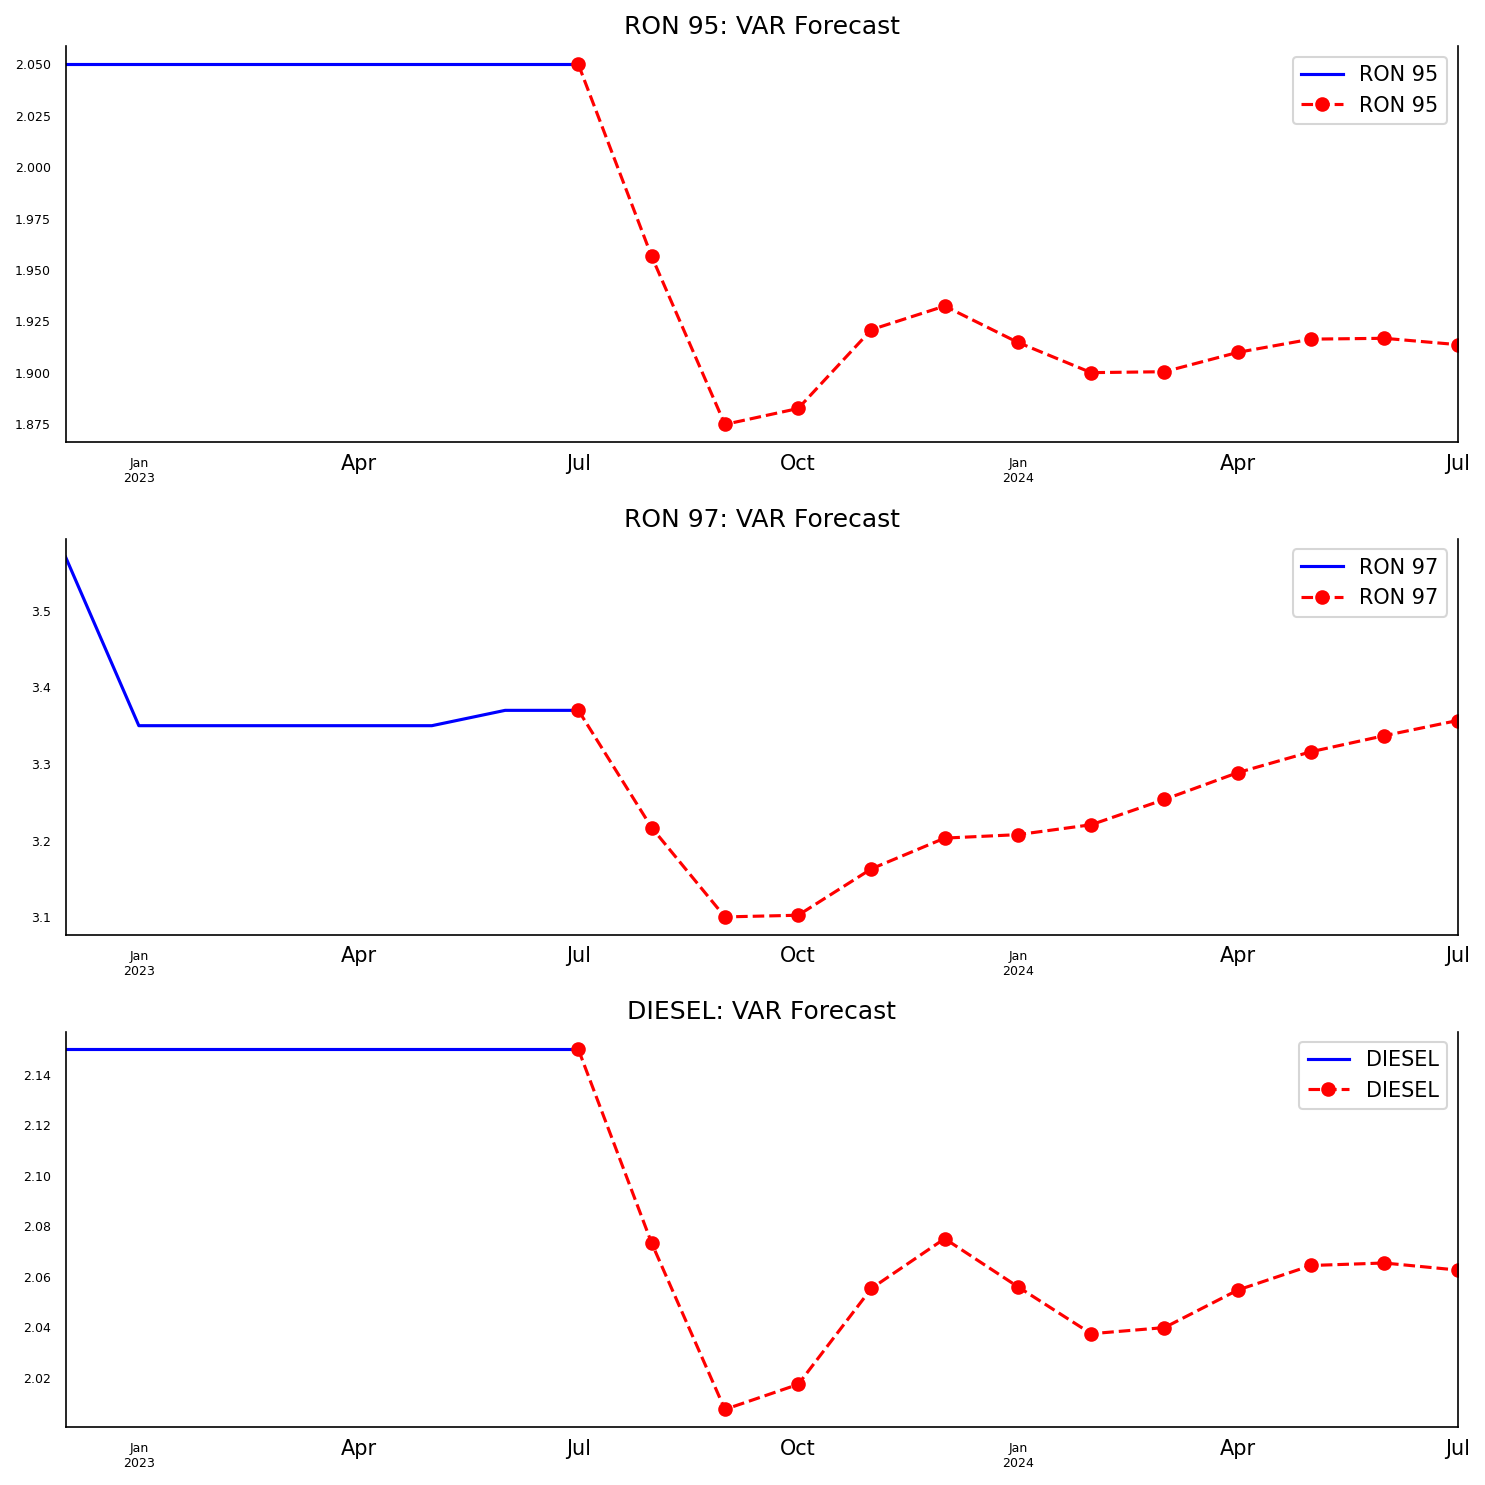

In [164]:
# Filter the DataFrame to include only 'RON95', 'RON97', and 'Diesel' columns
var_fc_plot_subset = var_fc_plot[['RON 95', 'RON 97', 'DIESEL']]

# Determine the index positions corresponding to the dates in fc_window
start_index = var_fc_plot_subset.index.get_loc('2023-08-01')
end_index = var_fc_plot_subset.index.get_loc('2024-07-01')

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(var_fc_plot_subset.columns), ncols=1, dpi=150, figsize=(10,10))

for i, col in enumerate(var_fc_plot_subset.columns):
    ax = axes[i]
    
    # Plot historical data
    var_fc_plot_subset[col].iloc[start_index-8:start_index].plot(legend=True, ax=ax, color='b')
    
    # Plot forecasted data
    var_fc_plot_subset[col].iloc[start_index-1:end_index+1].plot(legend=True, ax=ax, marker='o', color='r', linestyle='--')
    
    # Set title
    ax.set_title(col + ": VAR Forecast")
    
    # Remove ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Make top spine transparent
    ax.spines["top"].set_alpha(0)
    
    # Set tick label size
    ax.tick_params(labelsize=6)

plt.tight_layout()

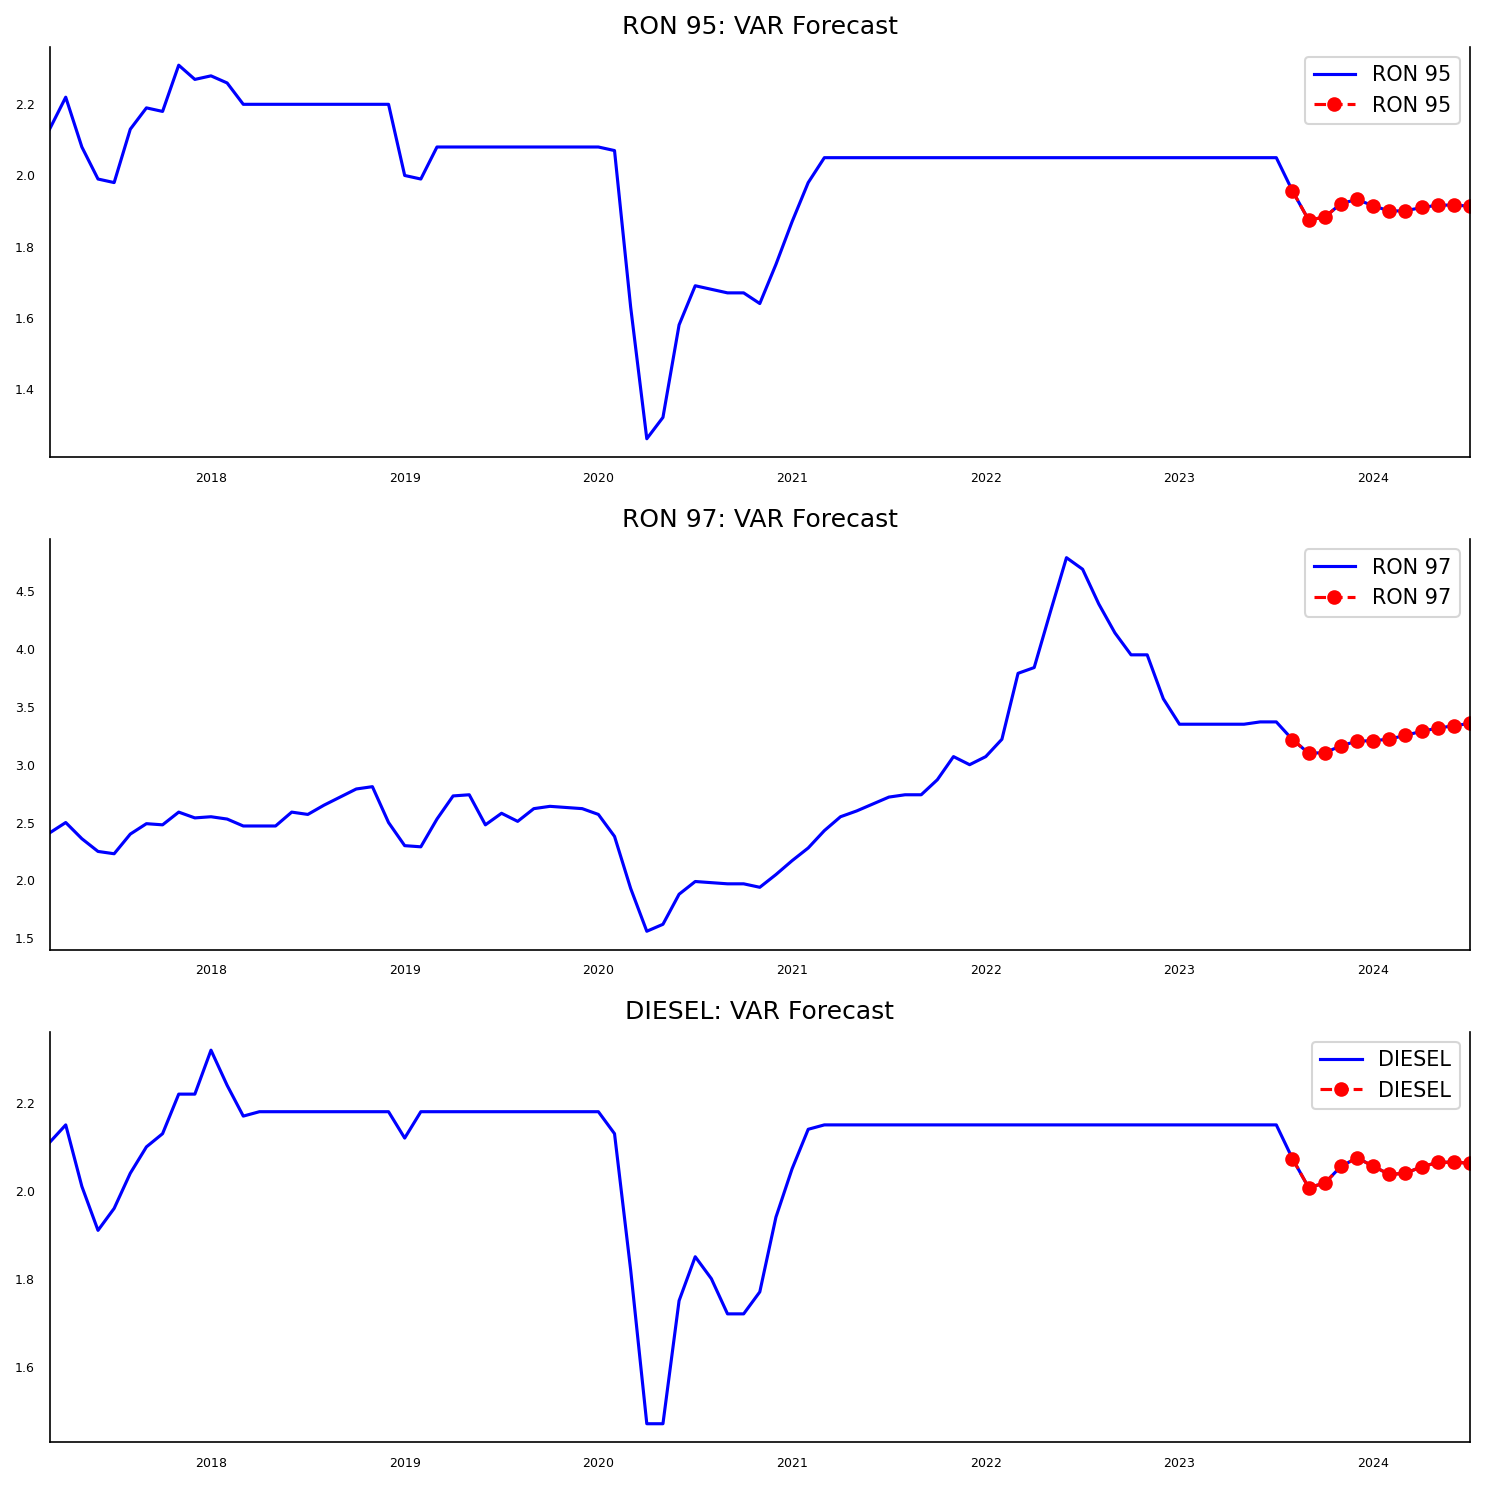

In [165]:
var_fc_plot_subset = var_fc_plot[['RON 95', 'RON 97', 'DIESEL']]

# Determine the index positions corresponding to the dates in fc_window
start_index = var_fc_plot.index.get_loc('2023-08-01')
end_index = var_fc_plot.index.get_loc('2024-07-01')

# Create subplots for each variable
fig, axes = plt.subplots(nrows=len(var_fc_plot_subset.columns), ncols=1, dpi=150, figsize=(10,10))

for i, col in enumerate(var_fc_plot_subset.columns):
    ax = axes[i]
    
    # Plot historical data in blue
    var_fc_plot_subset[col].plot(legend=True, ax=ax, color='b')
    
    # Plot forecasted data between start and end index in red
    var_fc_plot_subset[col].iloc[start_index:end_index+1].plot(legend=True, ax=ax, marker='o', color='r', linestyle='--')
    
    # Set title
    ax.set_title(col + ": VAR Forecast")
    
    # Remove ticks
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    
    # Make top spine transparent
    ax.spines["top"].set_alpha(0)
    
    # Set tick label size
    ax.tick_params(labelsize=6)

plt.tight_layout()

In [166]:
var_fc_plot_subset.to_excel('VAR forecasting.xlsx',index=True)